In [5]:
import pandas as pd

df = pd.read_csv('Data/month_국가업종.csv', encoding='utf-8')
df.head(2)

,년,월,국가코드,업종코드,파산율,지급불능율,지급거절율,지급지체율,인수거절및불능율,부도율,평가건수
0,2011,7,100.0,46.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2011,7,115.0,13.0,0.0,0.0,0.0,0.0,0.0,0.111111,9.0


In [12]:
df['국가코드'] = df['국가코드'].astype(int)
df['국가코드'] = df['국가코드'].astype(str)

In [4]:
country = pd.read_csv('Data/country.csv', encoding='utf-8')
country.head(3)

,수입자국가코드,국가한글명,표준약식국가코드
0,299,중동 기타국가,NaN
1,170,시킴,NaN
2,199,아시아 기타국가,NaN


In [7]:
country.rename(columns={'수입자국가코드': '국가코드'}, inplace=True)

In [13]:
country['국가코드'] = country['국가코드'].astype(str)

In [15]:
uu = df.merge(country, on='국가코드', how='left')

In [16]:
uu[uu['국가한글명'] == '카자흐스탄']

,년,월,국가코드,업종코드,파산율,지급불능율,지급거절율,지급지체율,인수거절및불능율,부도율,평가건수,국가한글명,표준약식국가코드
857,2011,7,333,11.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,카자흐스탄,KZ
858,2011,7,333,22.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,카자흐스탄,KZ
859,2011,7,333,26.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,카자흐스탄,KZ
860,2011,7,333,41.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,카자흐스탄,KZ
861,2011,7,333,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,카자흐스탄,KZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277368,2025,7,333,22.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,카자흐스탄,KZ
277369,2025,7,333,30.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,카자흐스탄,KZ
277370,2025,7,333,45.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,카자흐스탄,KZ
277371,2025,7,333,46.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,카자흐스탄,KZ


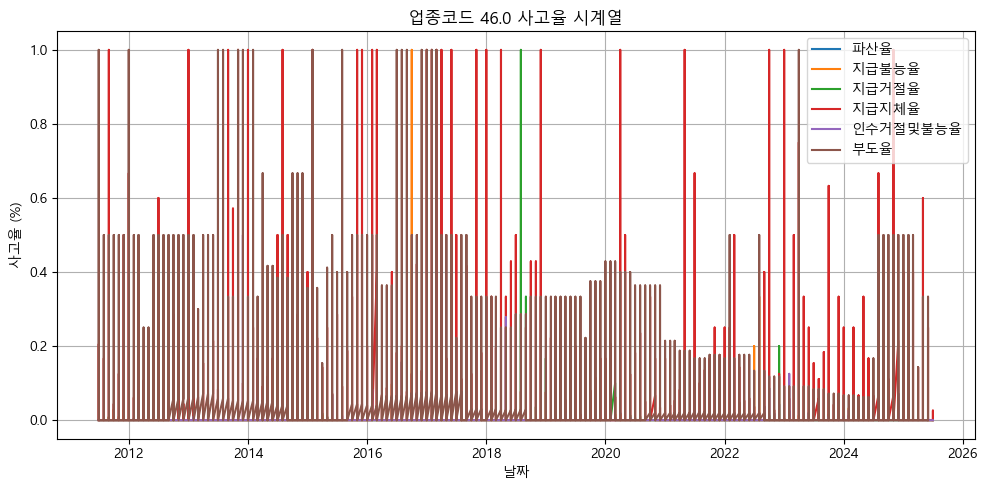

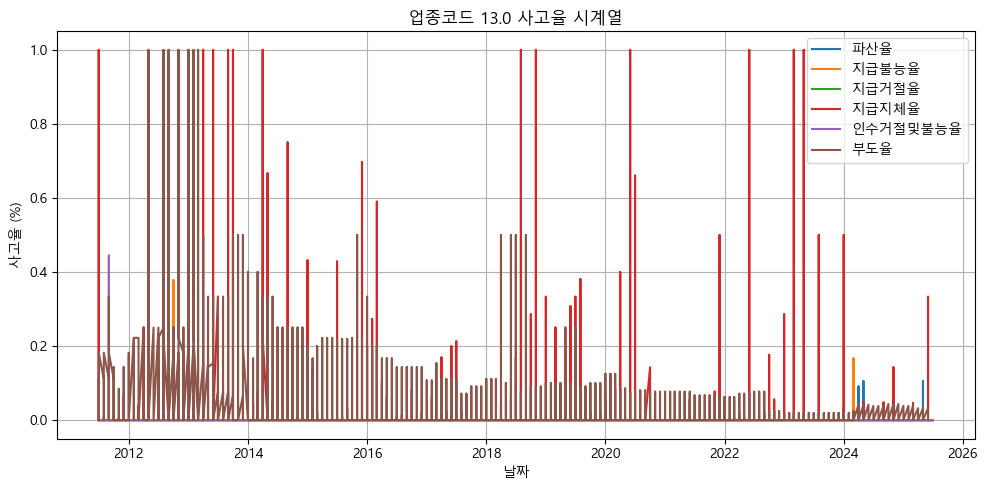

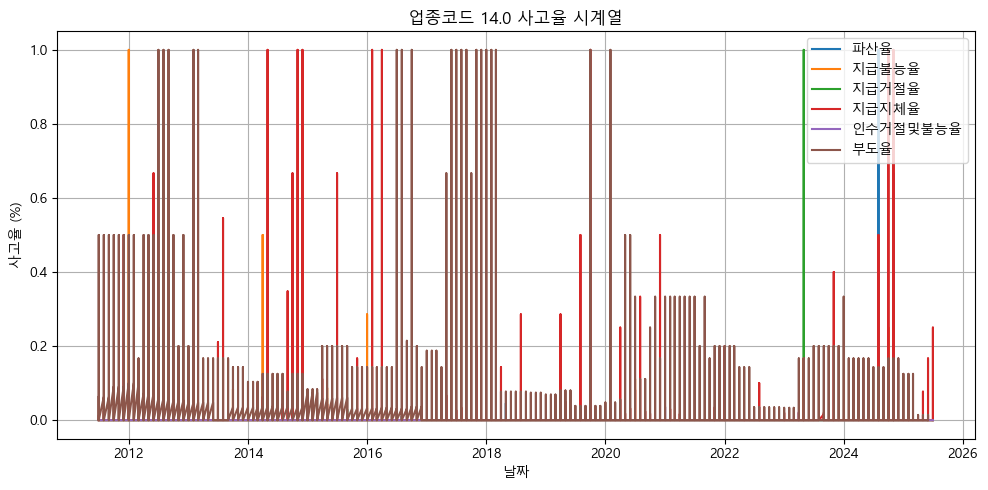

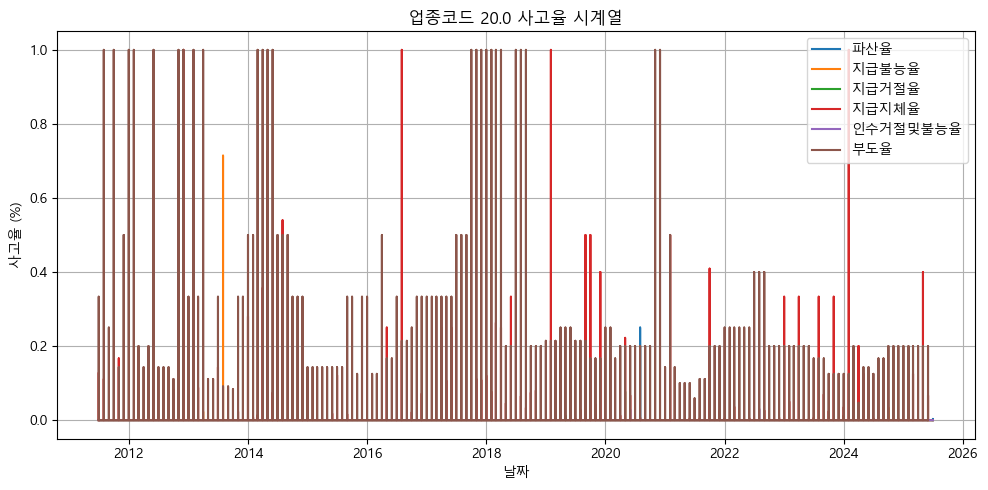

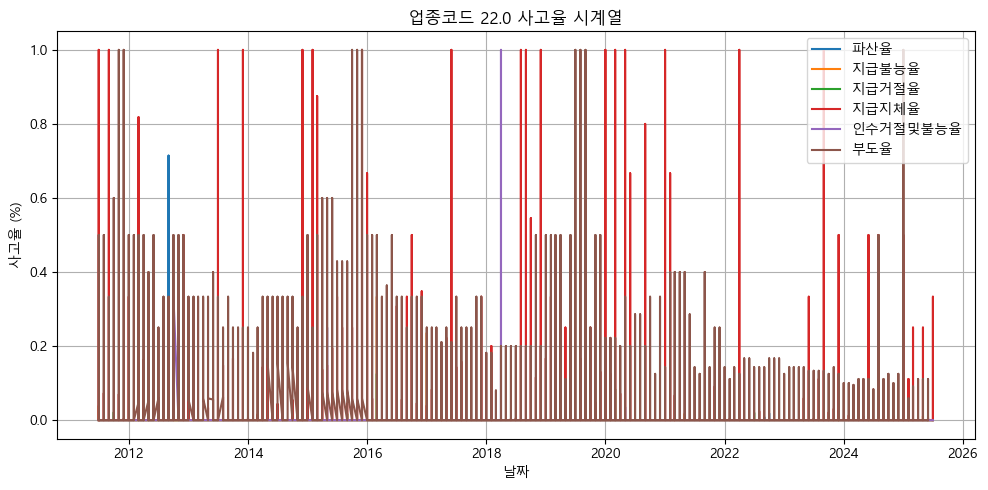

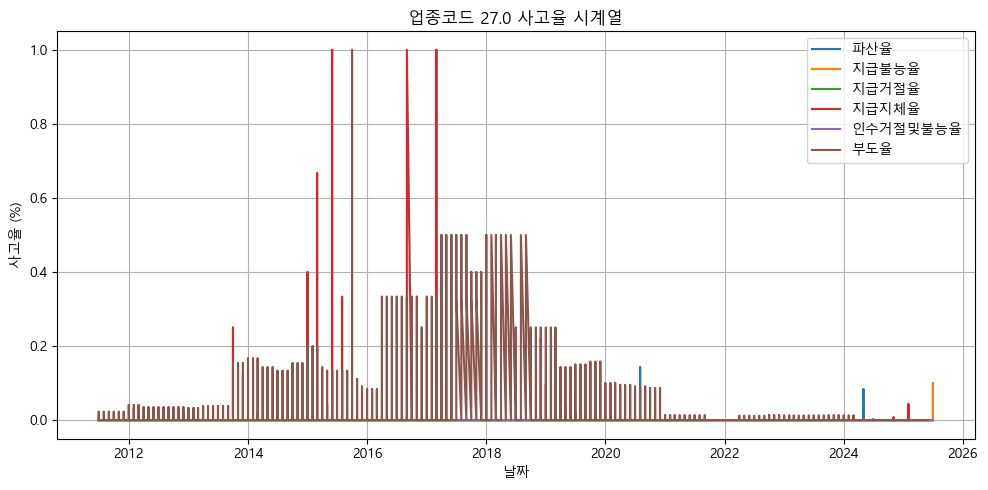

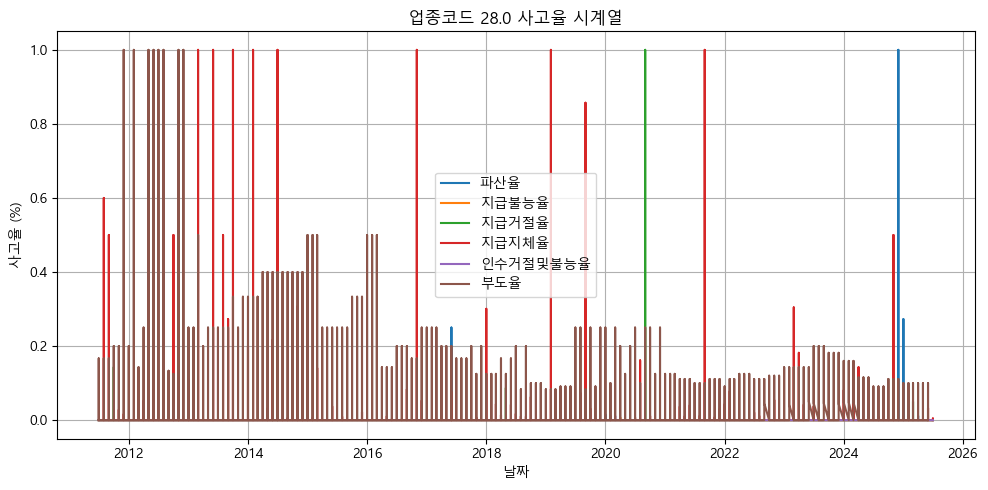

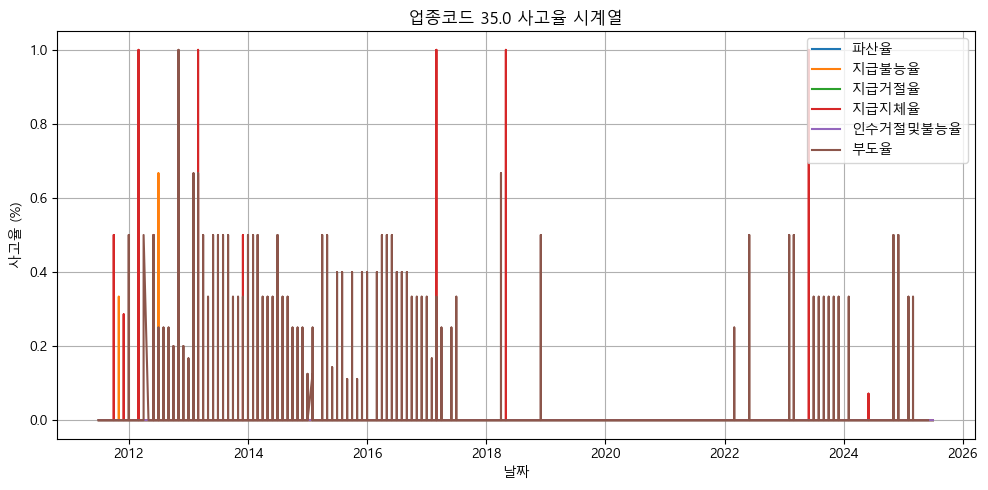

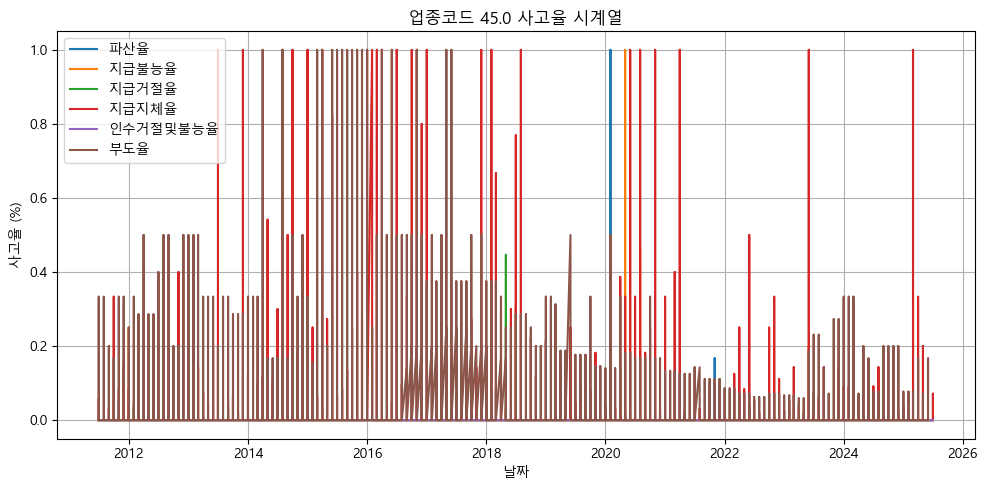

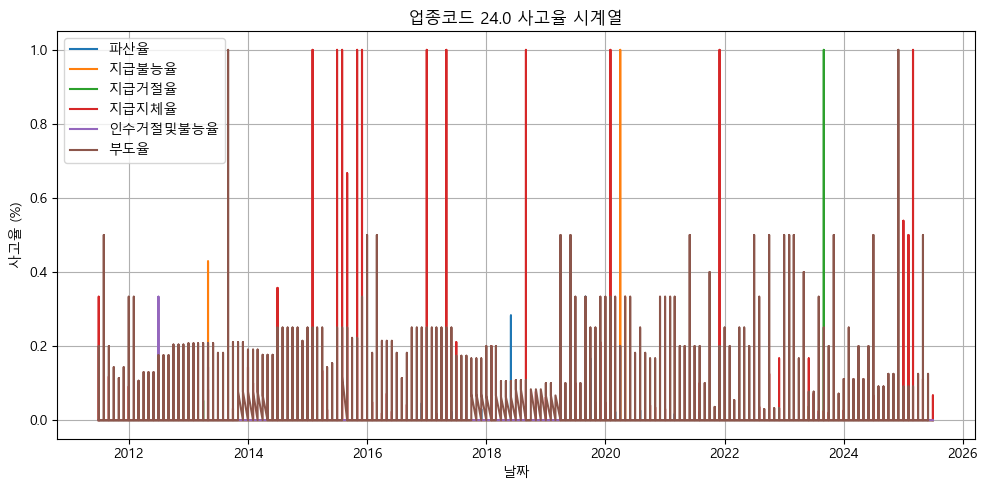

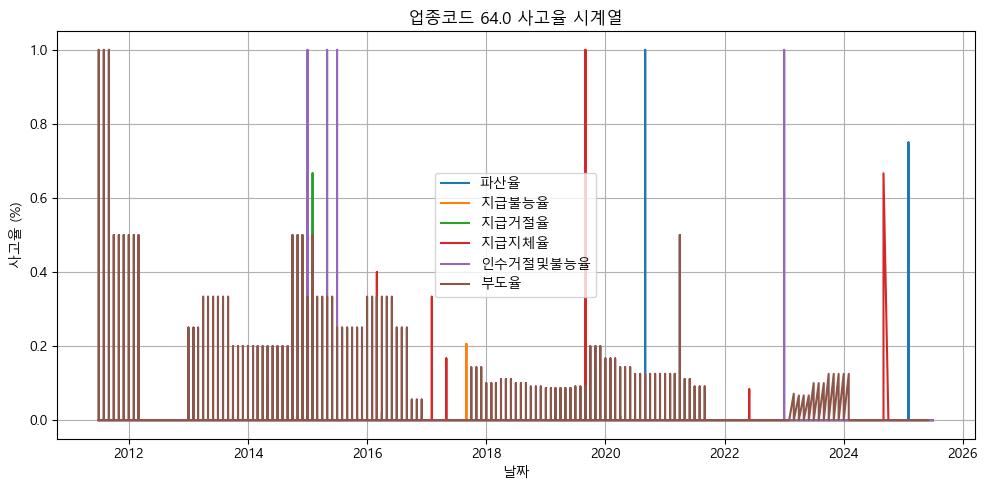

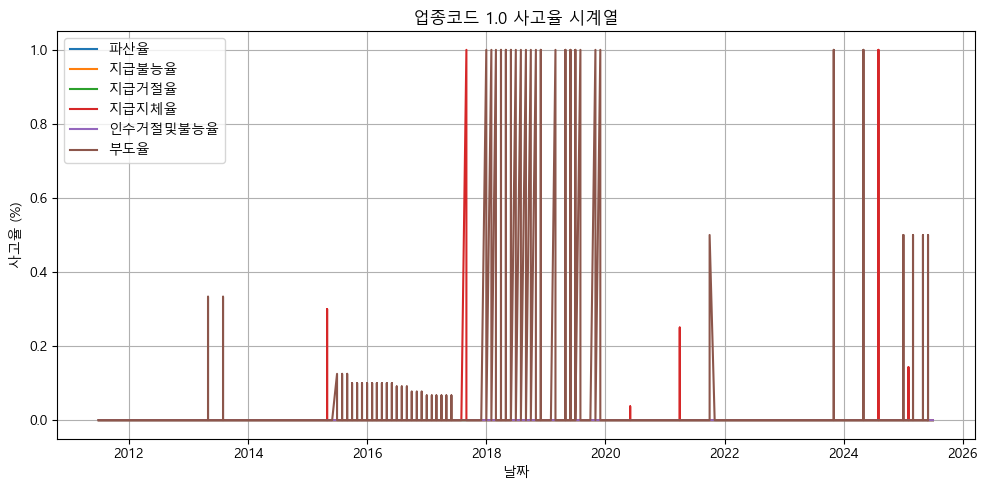

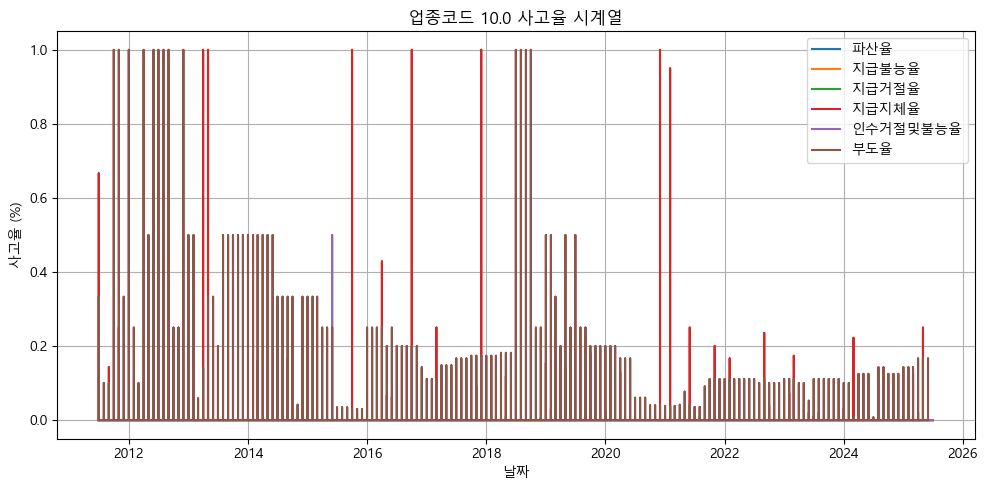

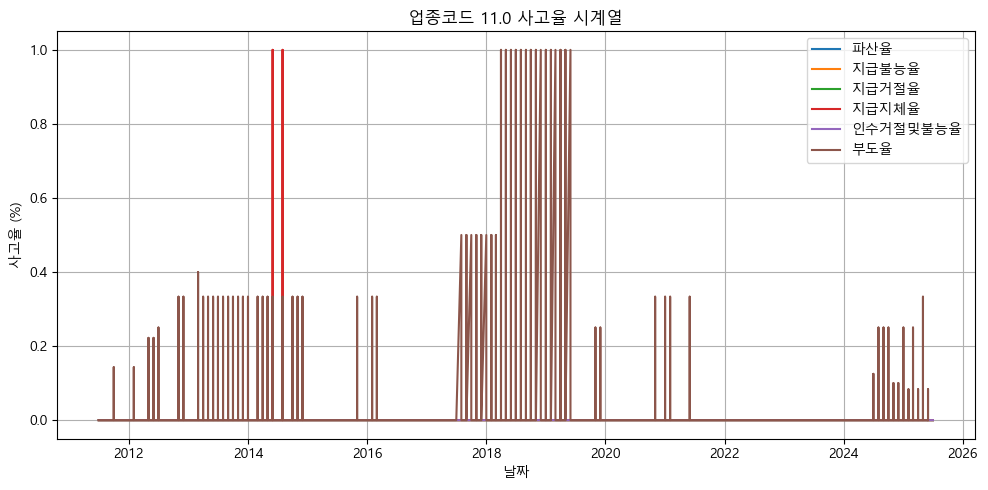

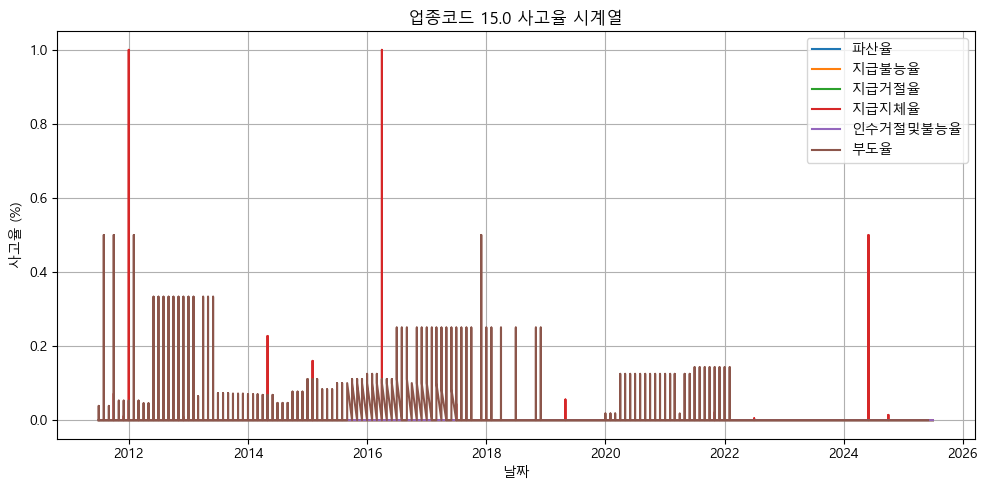

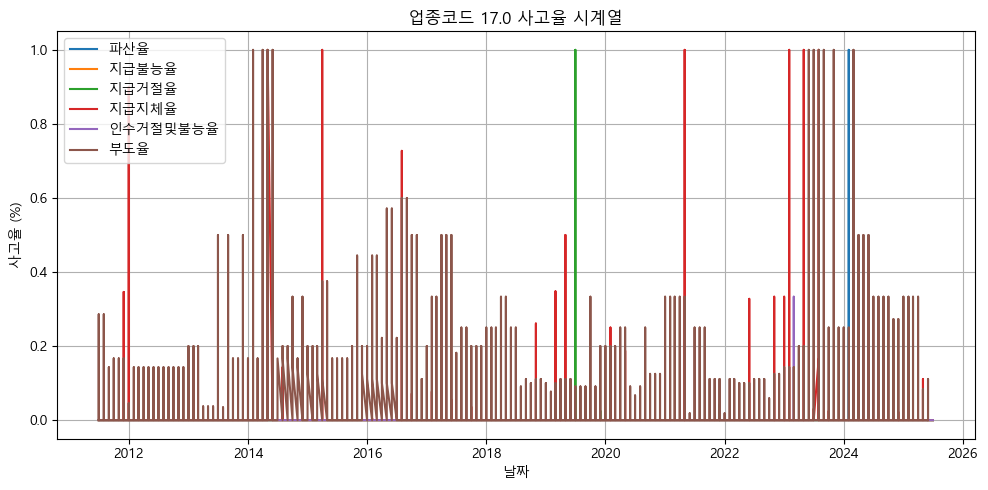

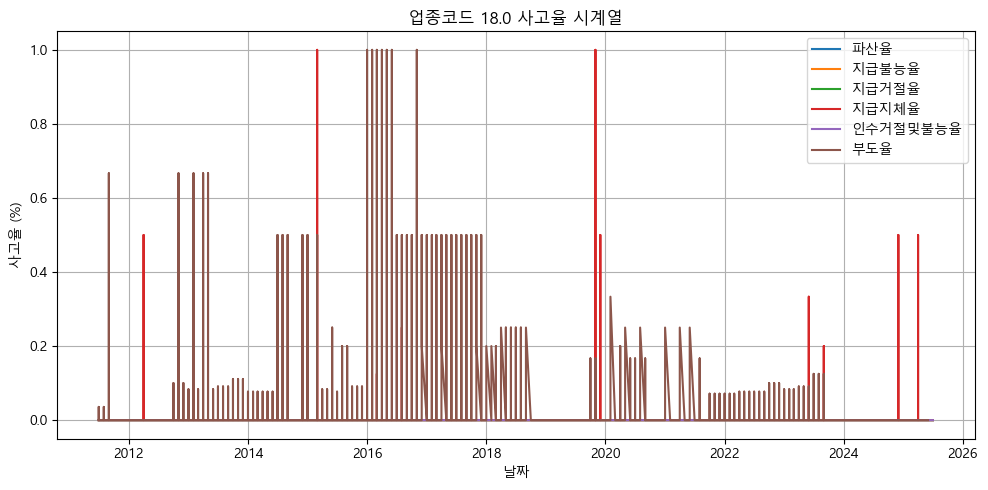

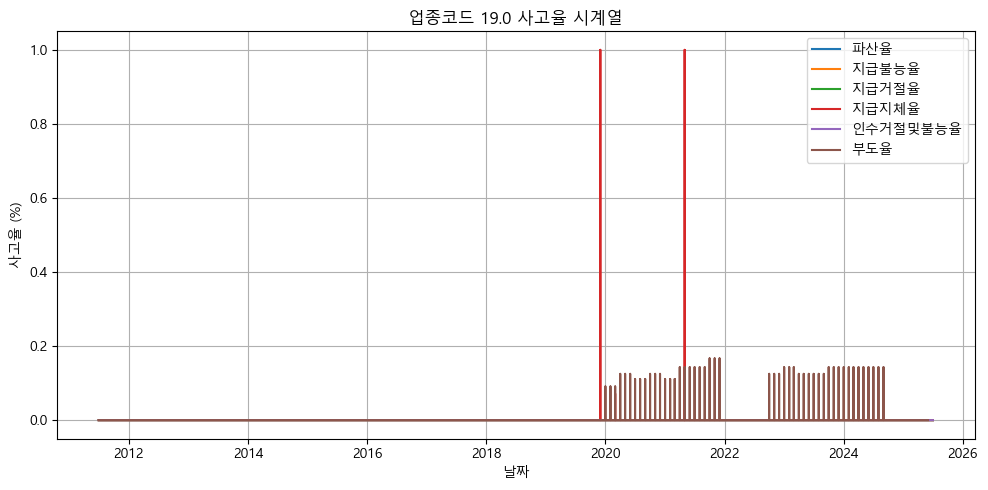

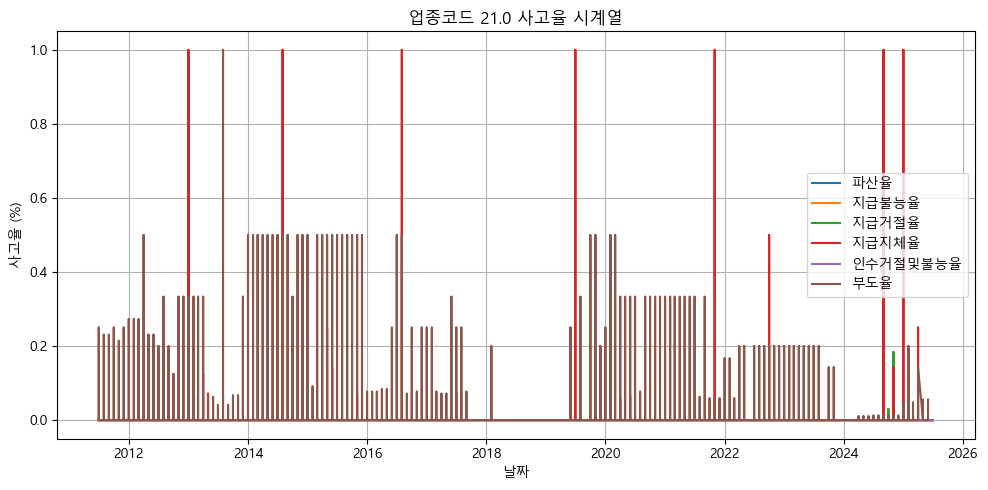

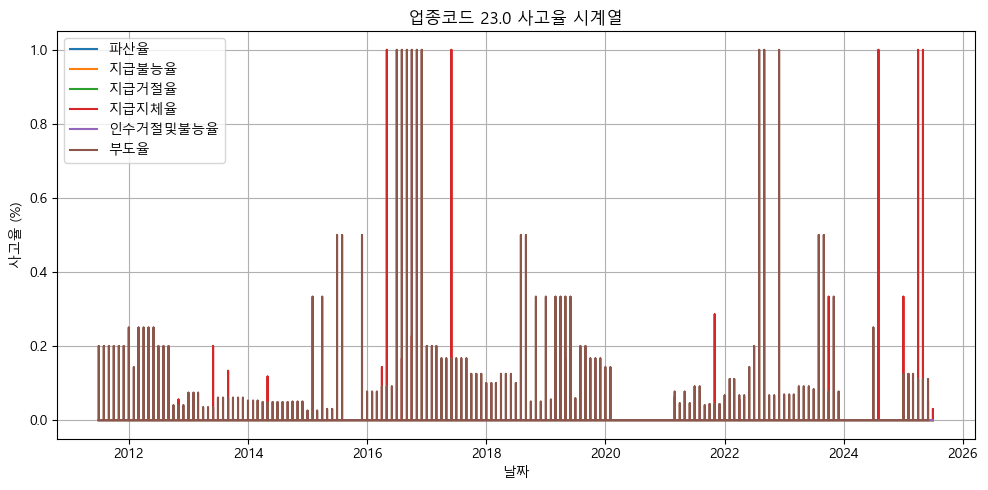

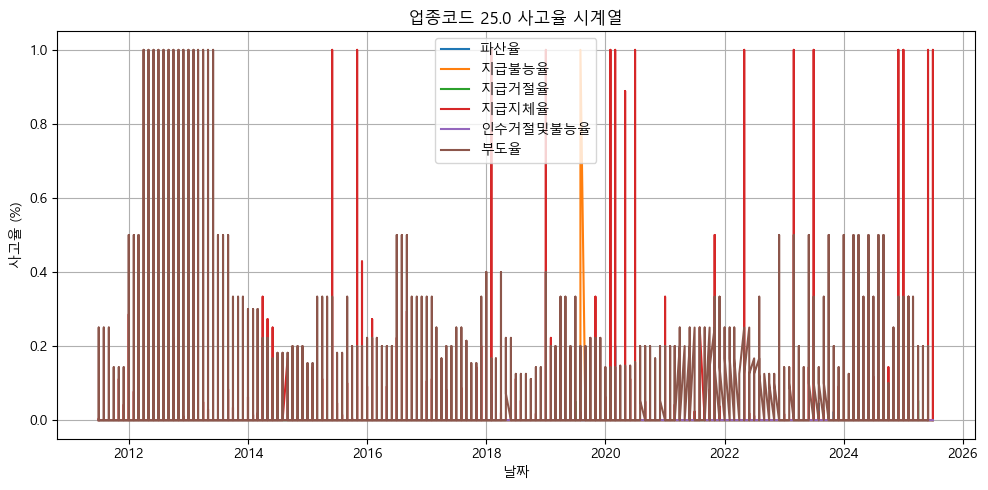

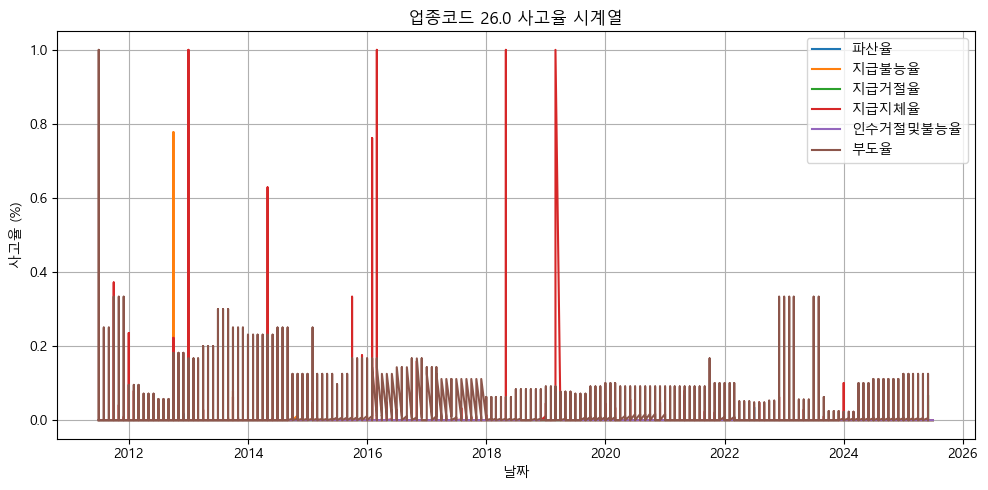

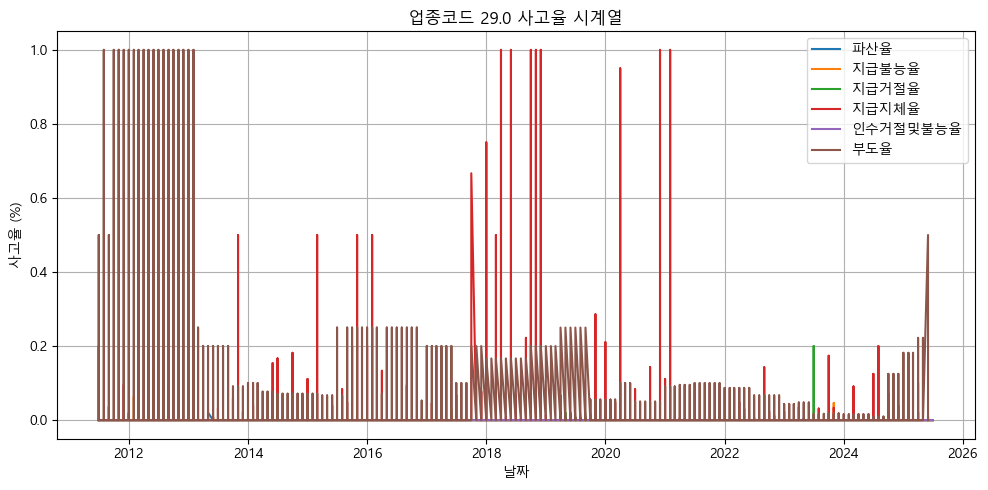

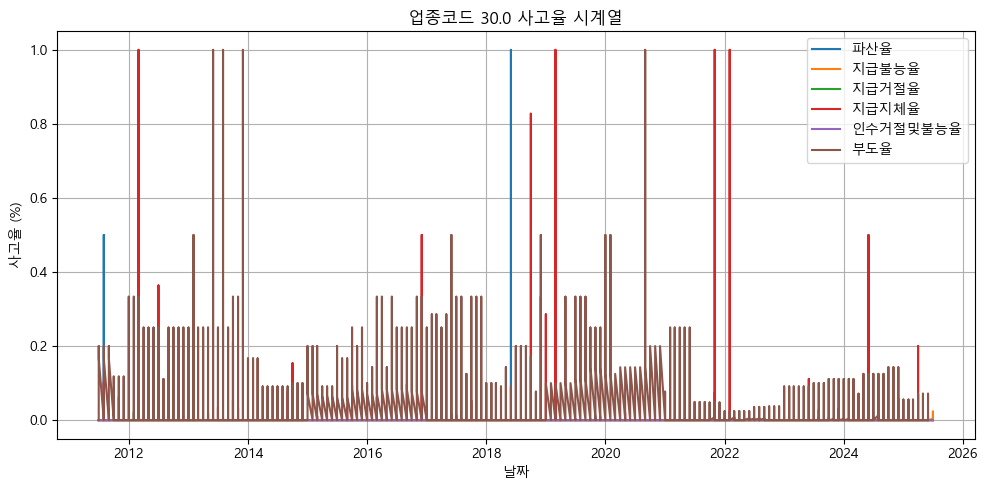

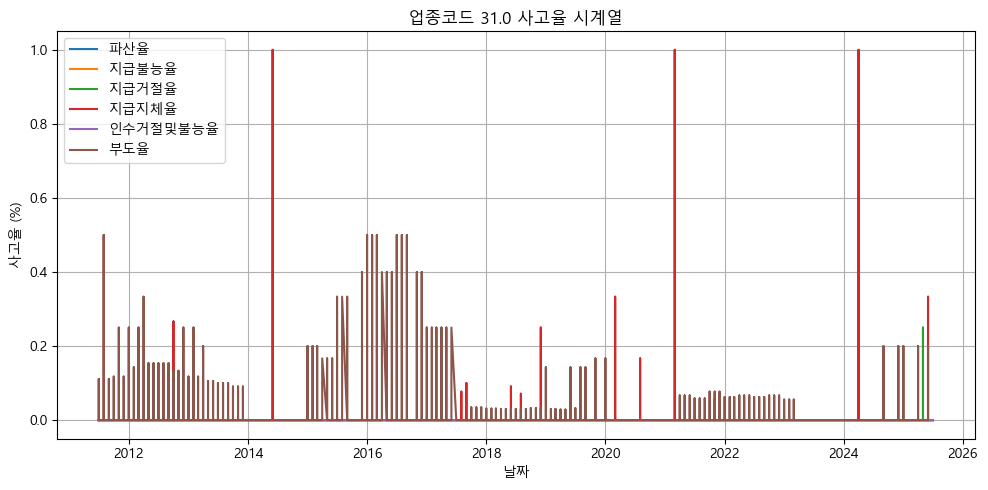

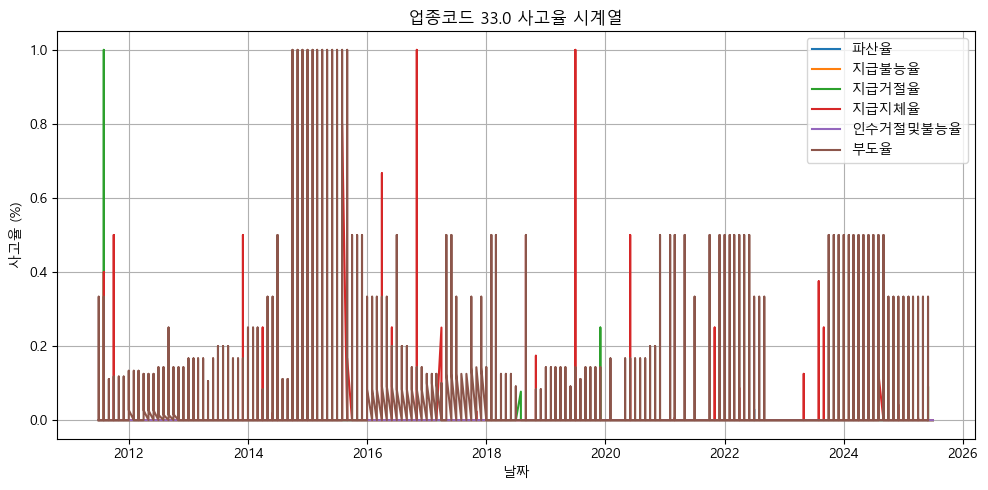

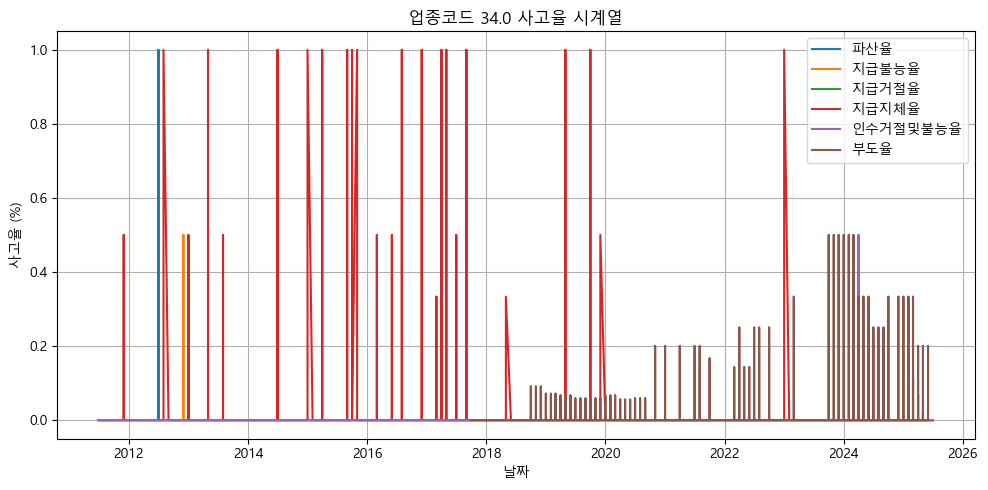

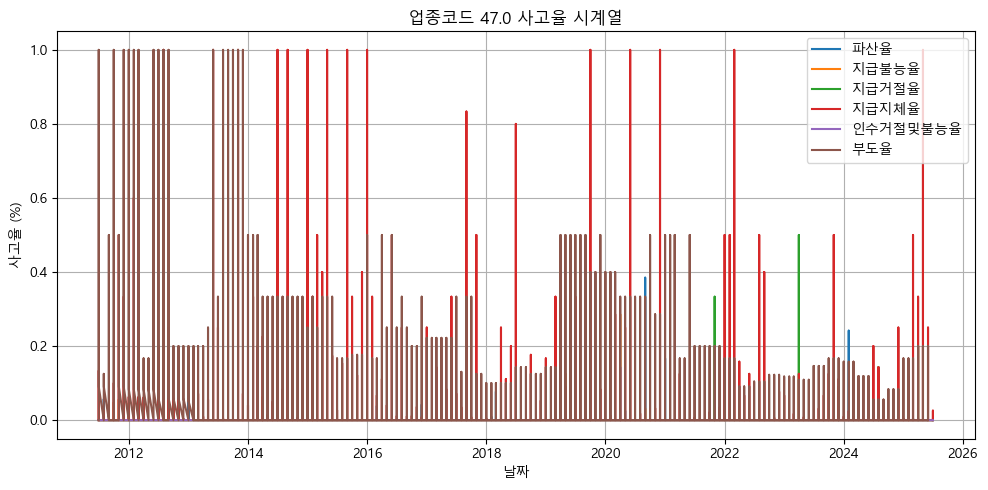

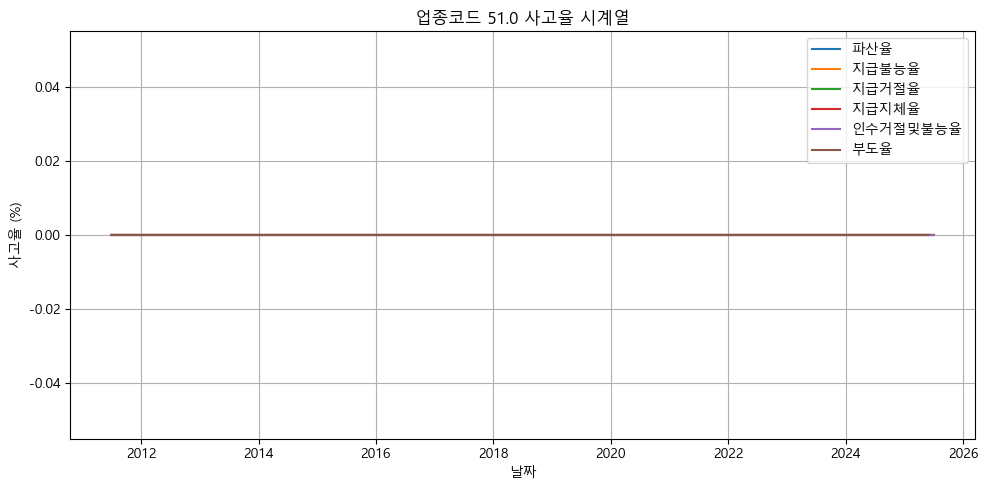

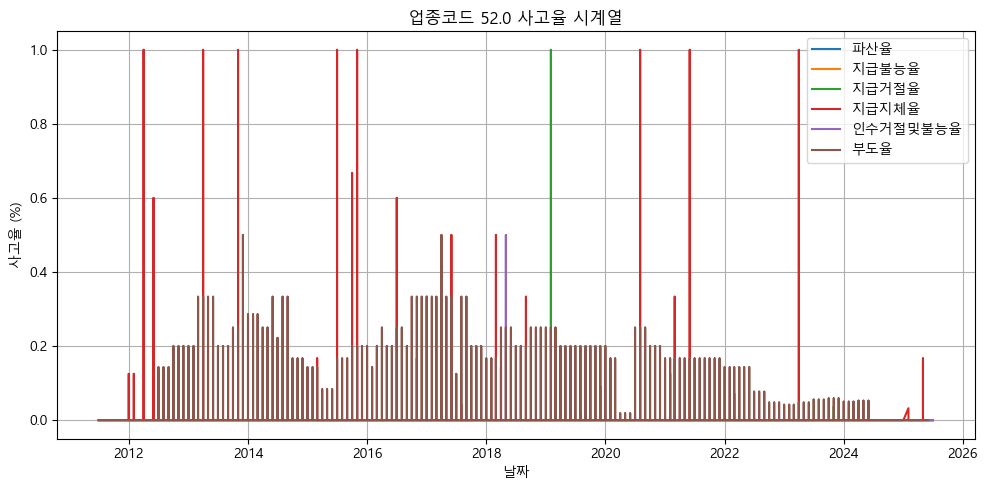

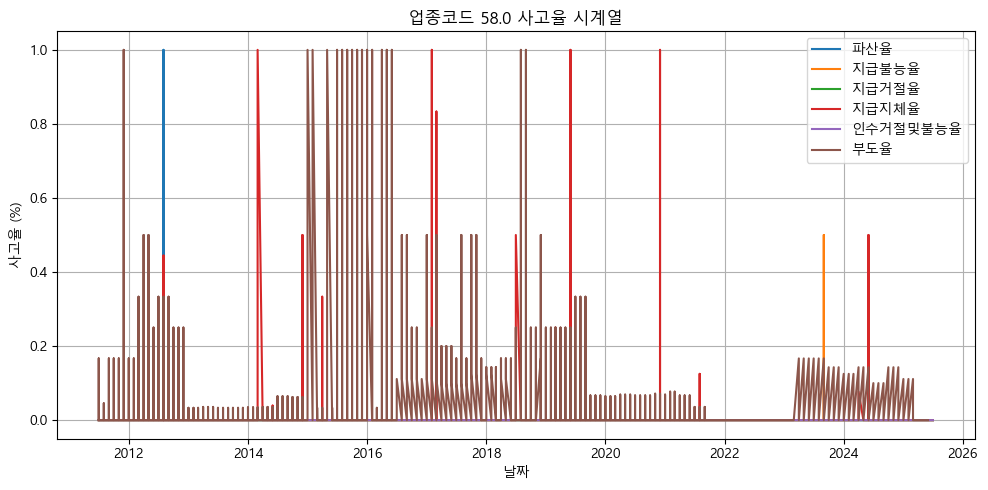

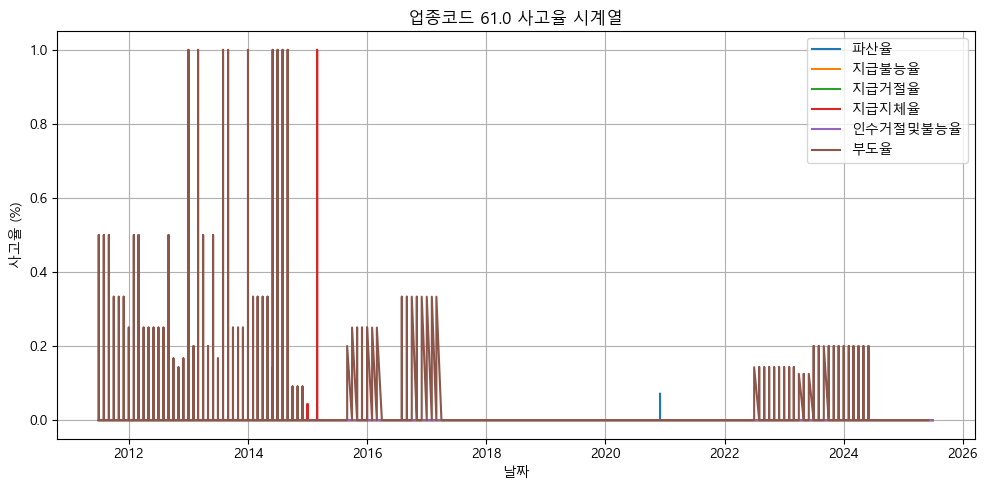

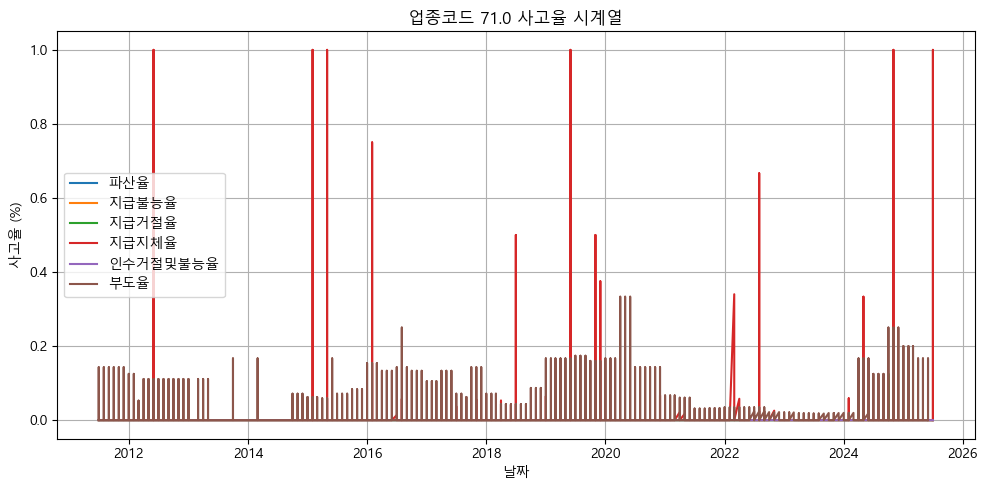

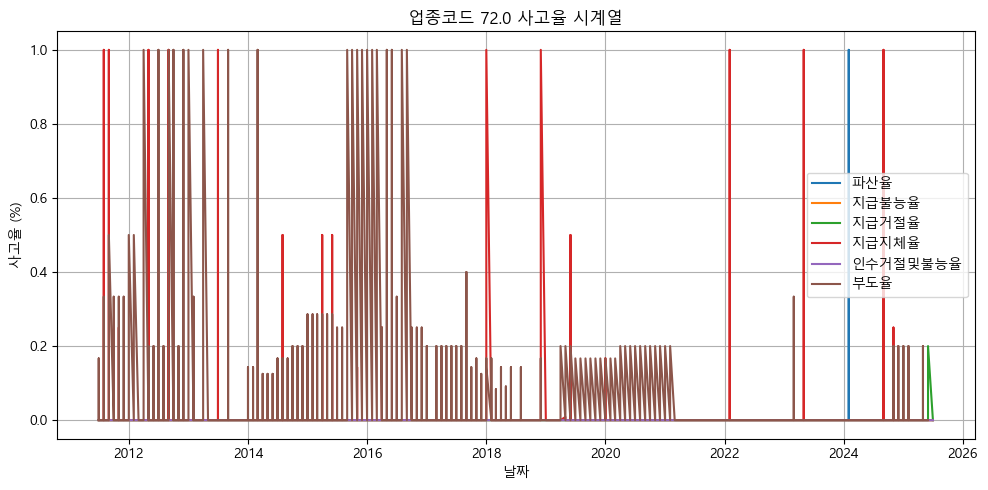

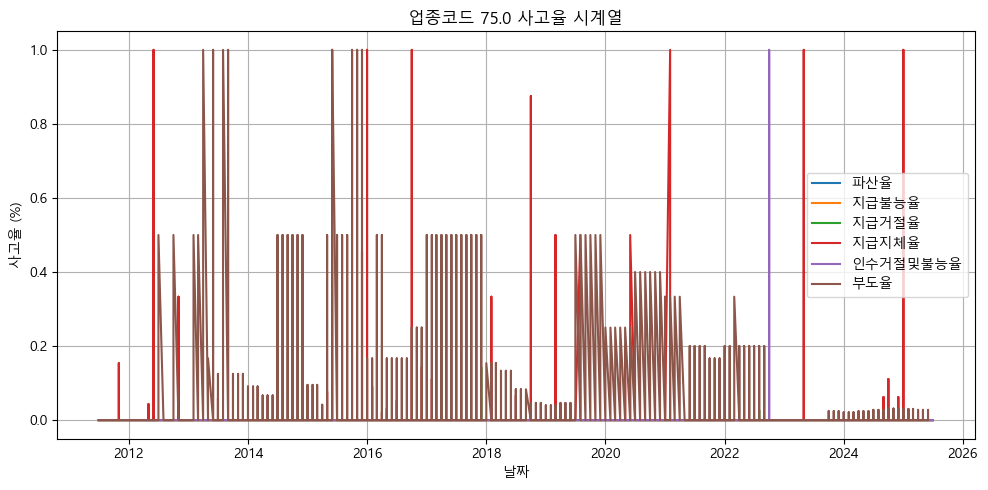

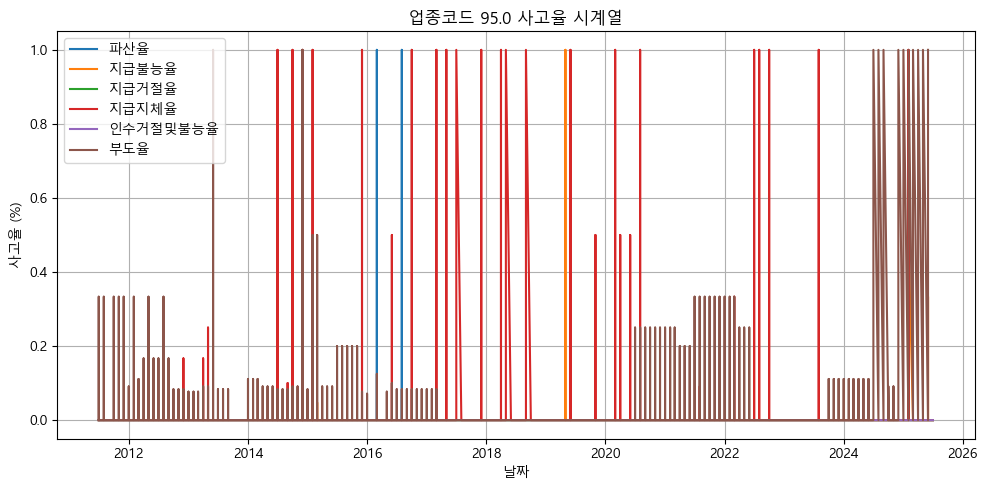

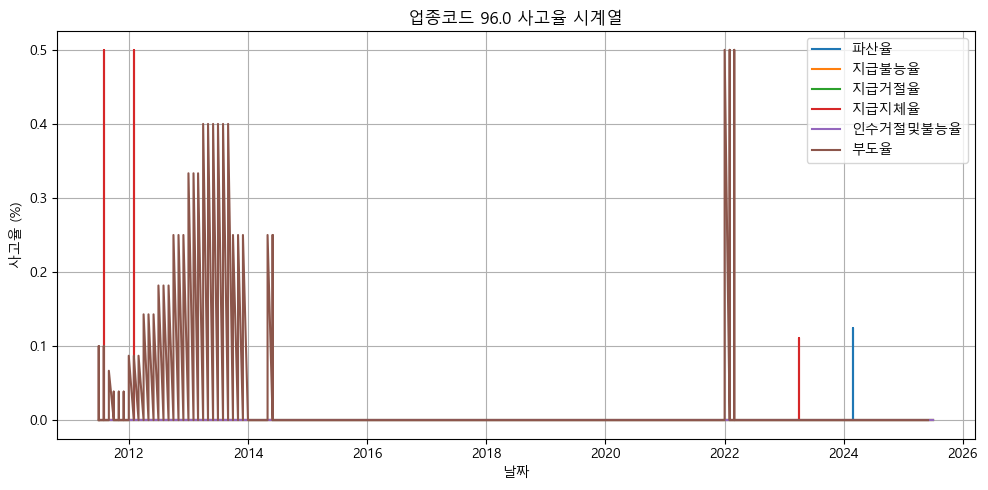

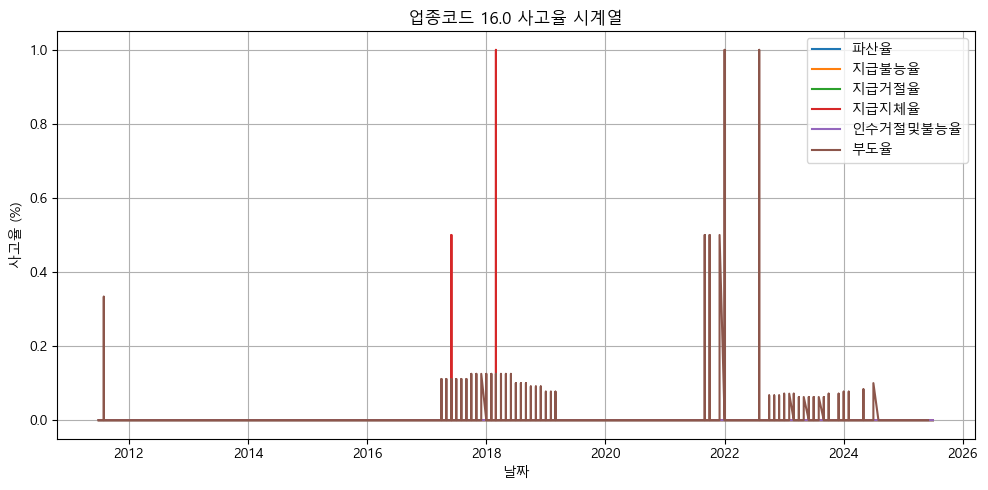

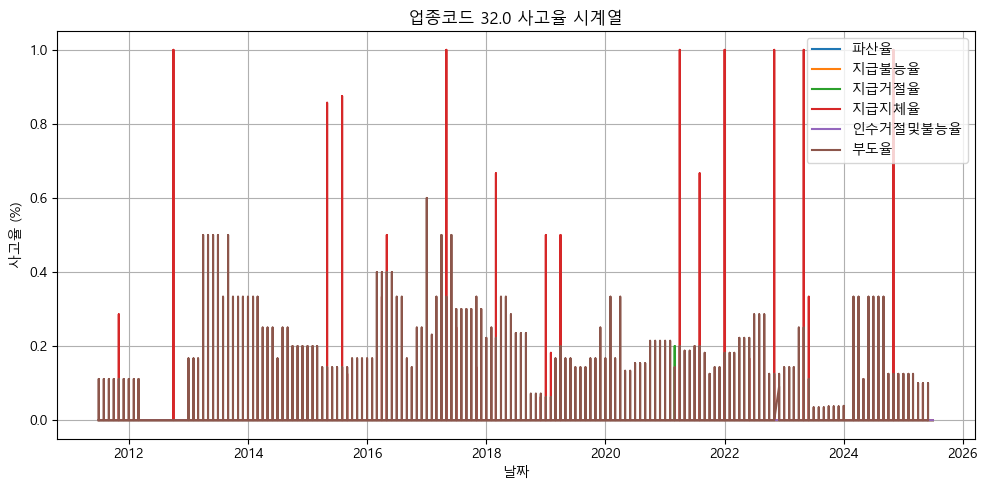

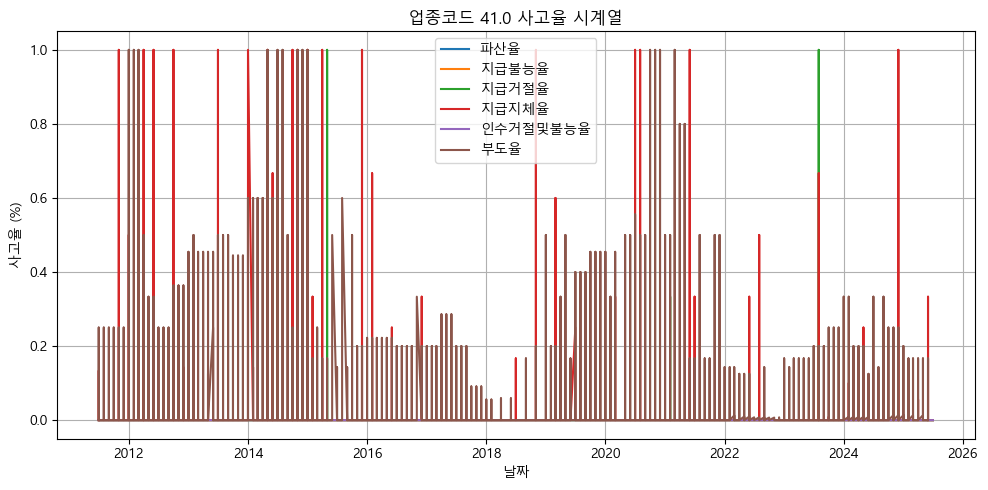

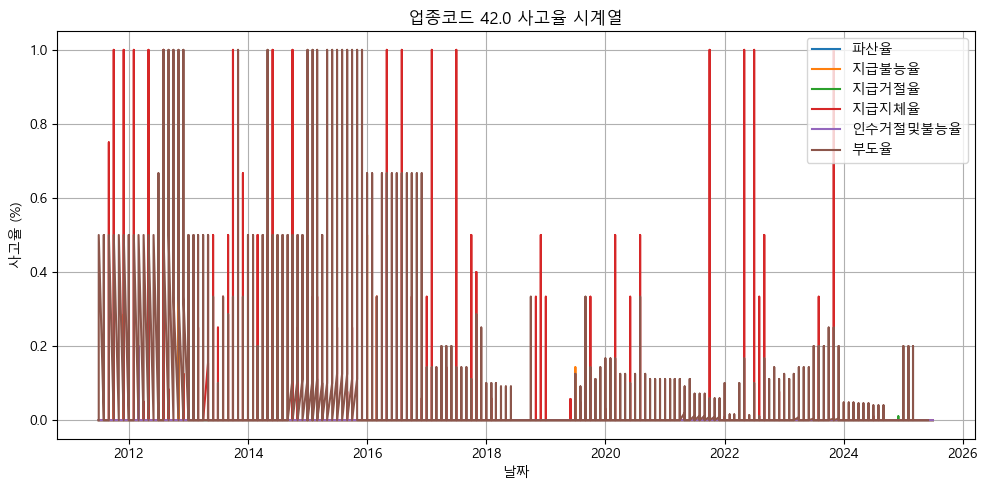

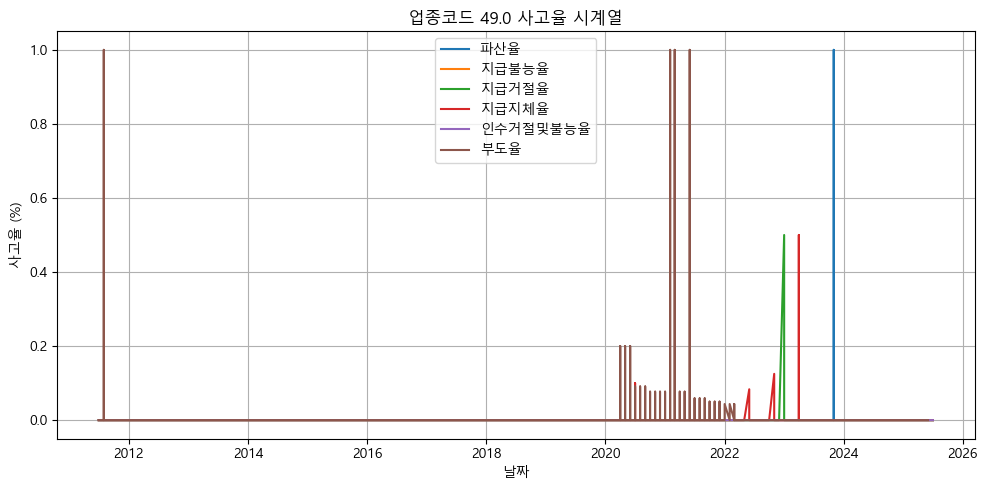

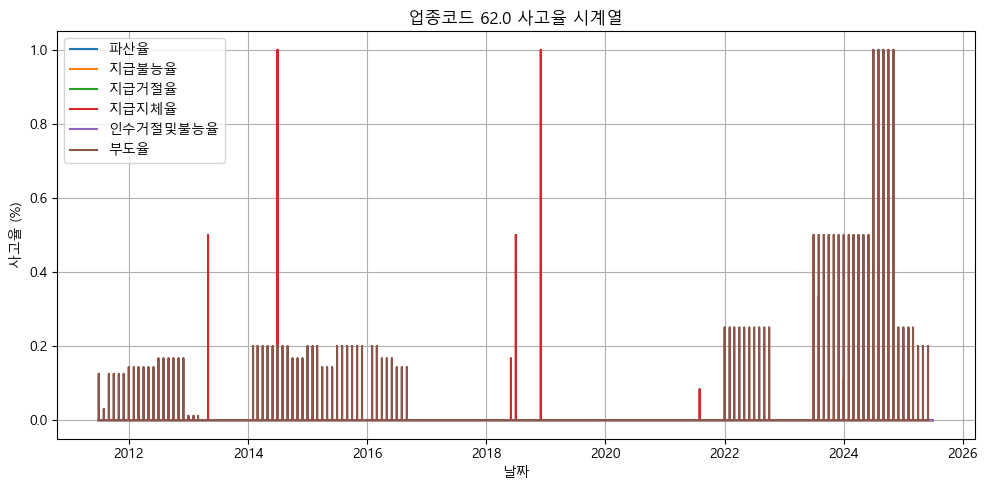

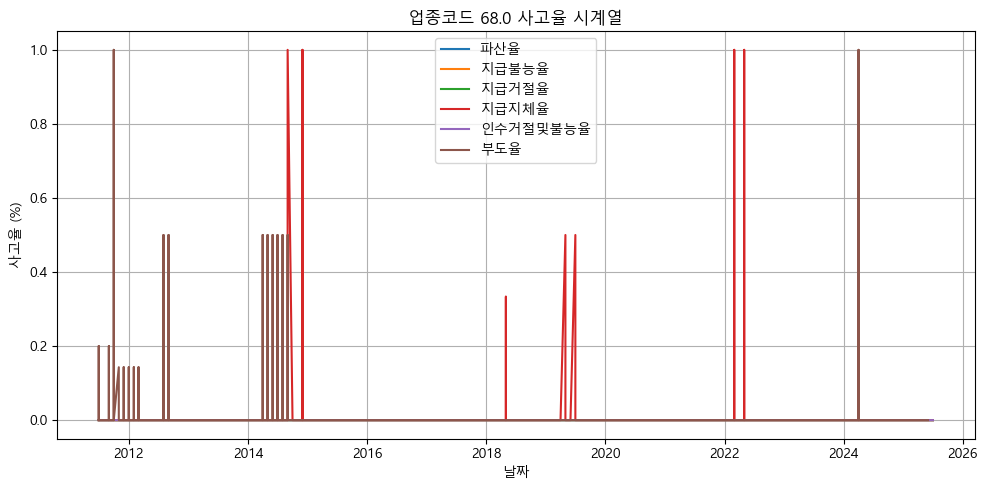

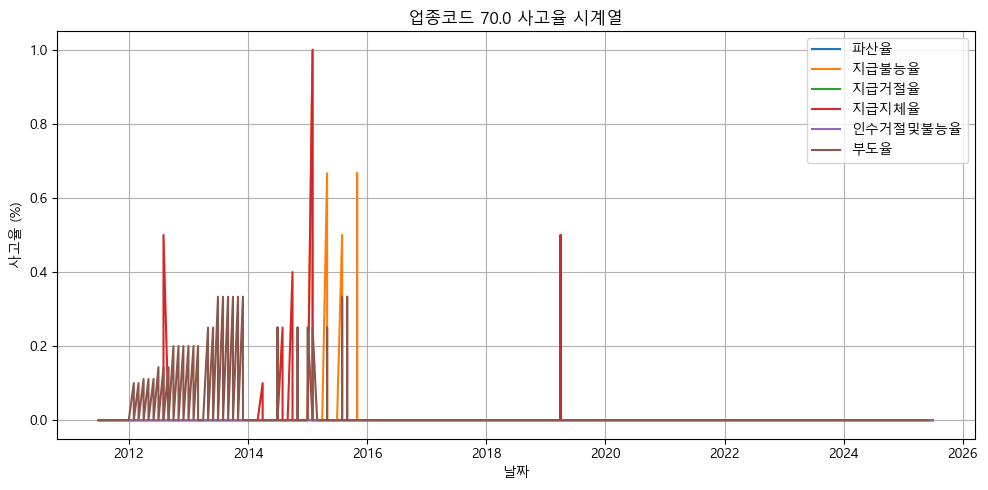

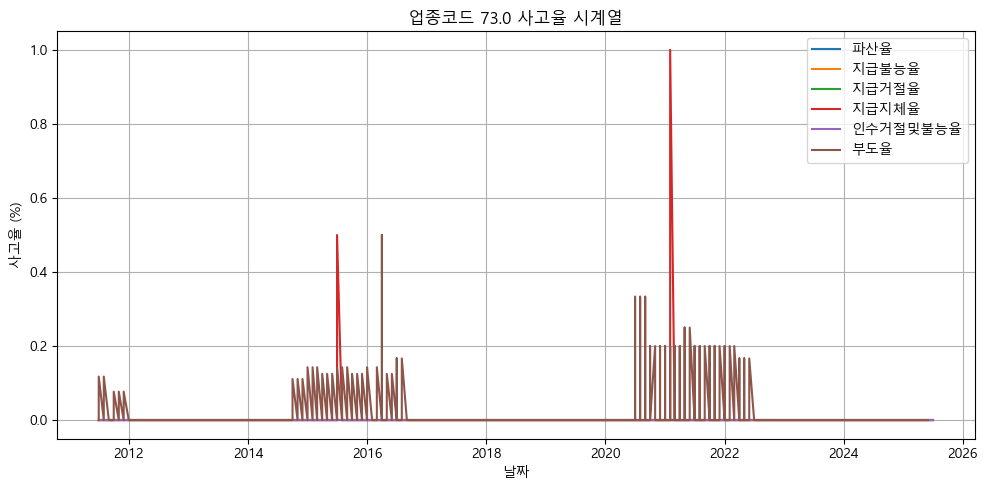

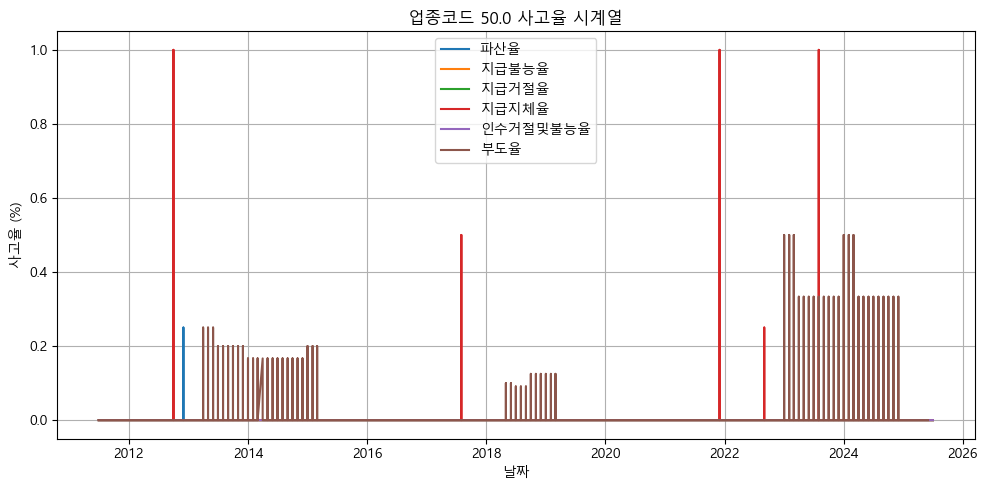

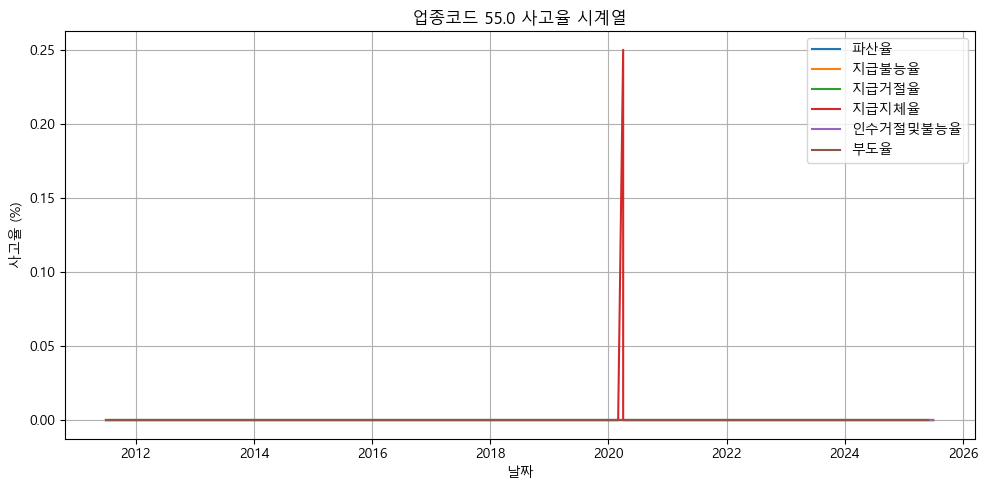

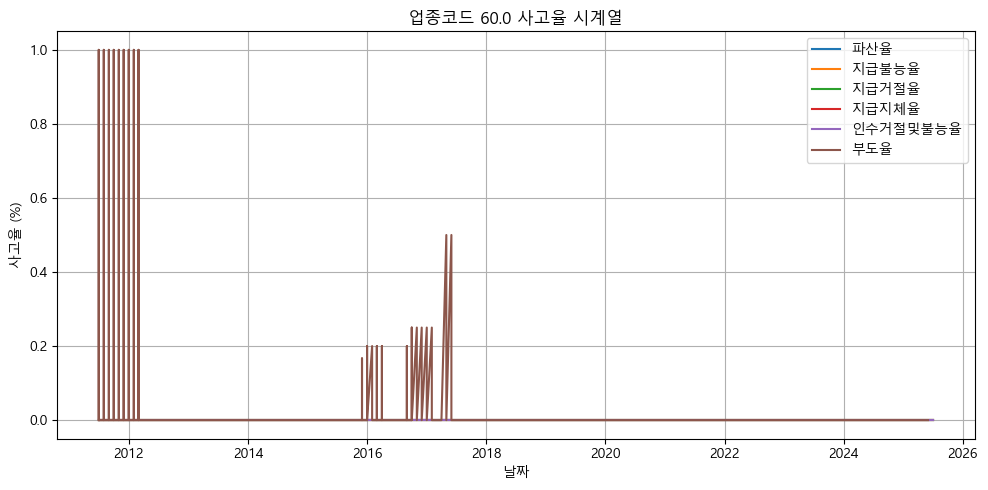

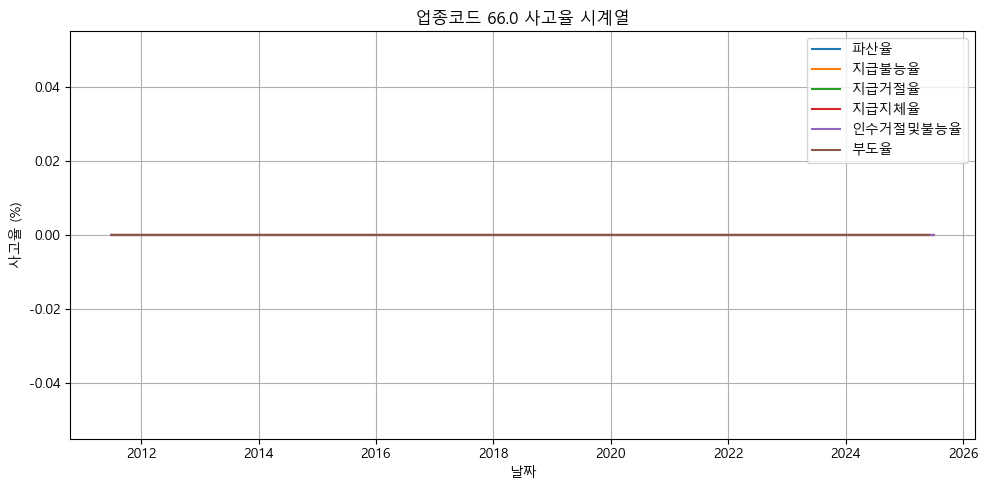

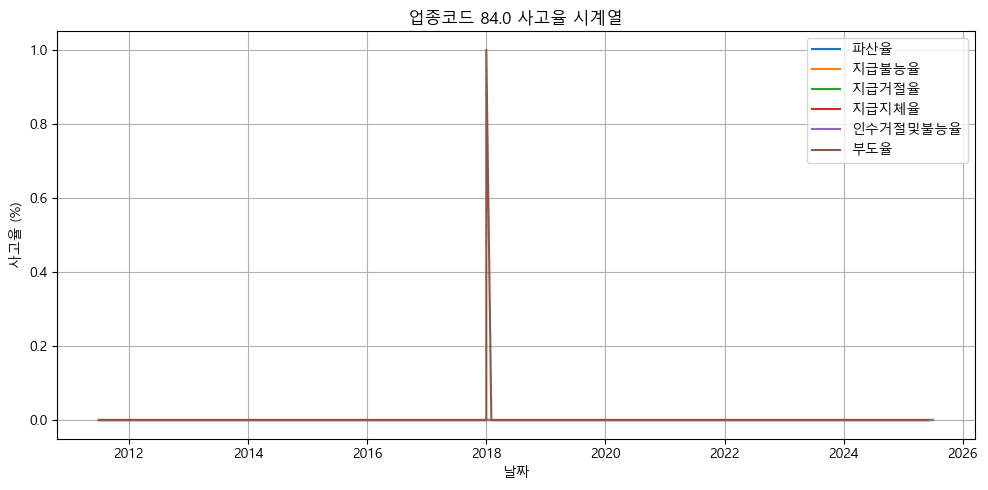

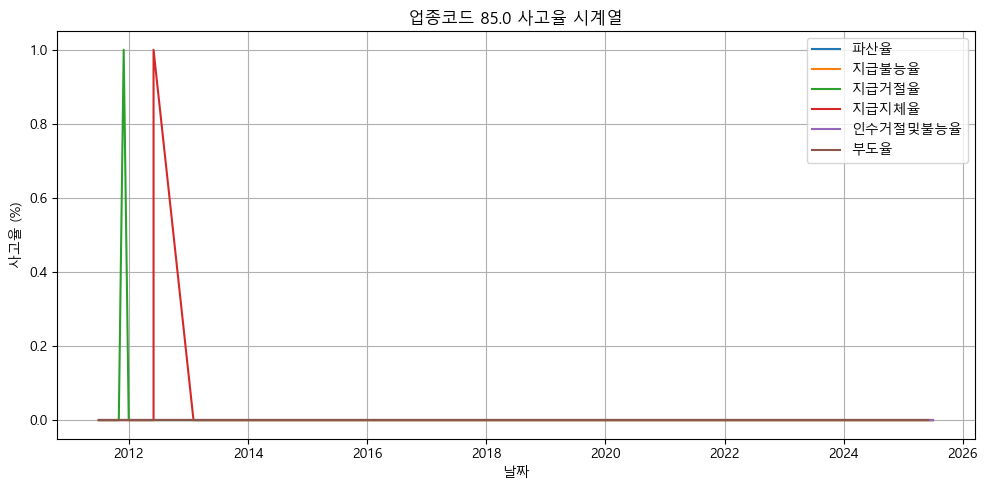

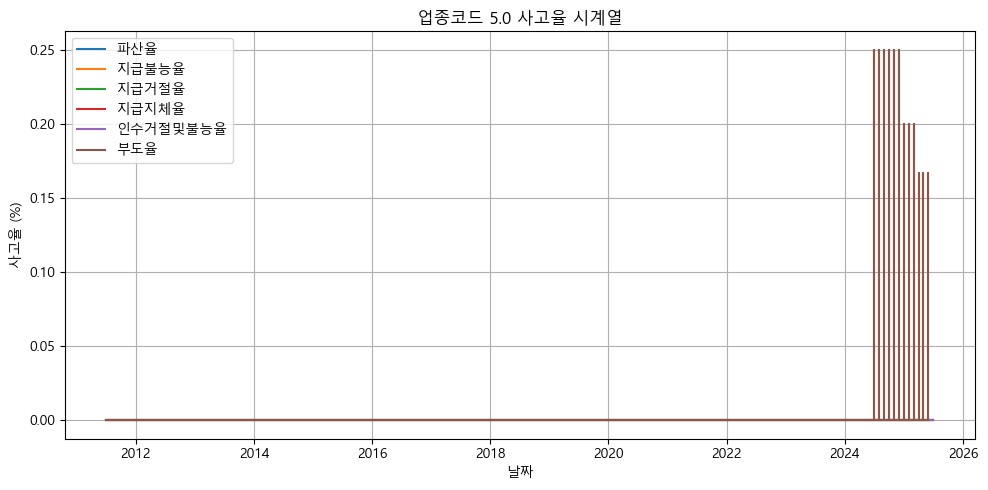

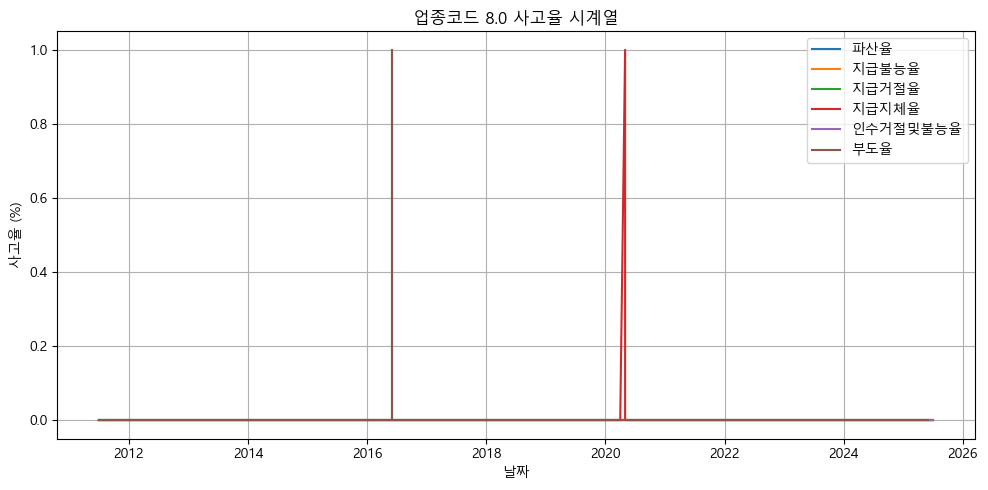

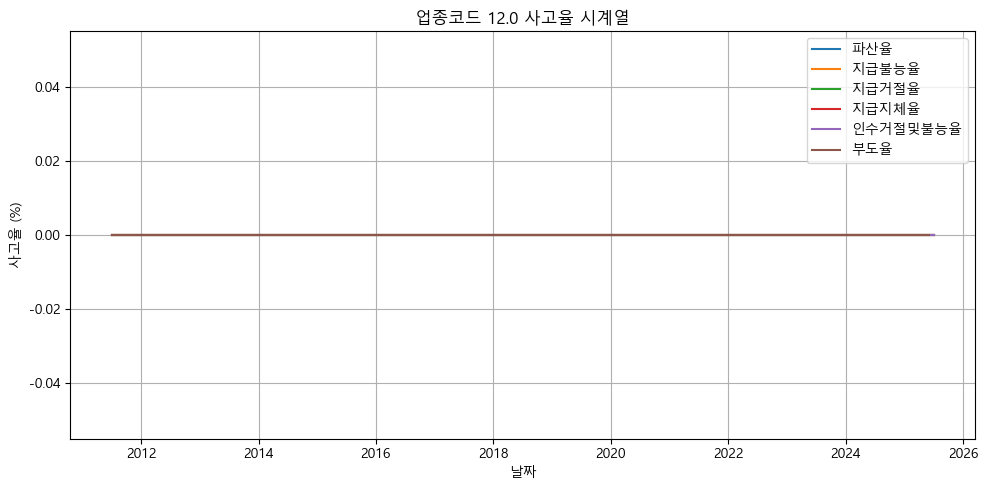

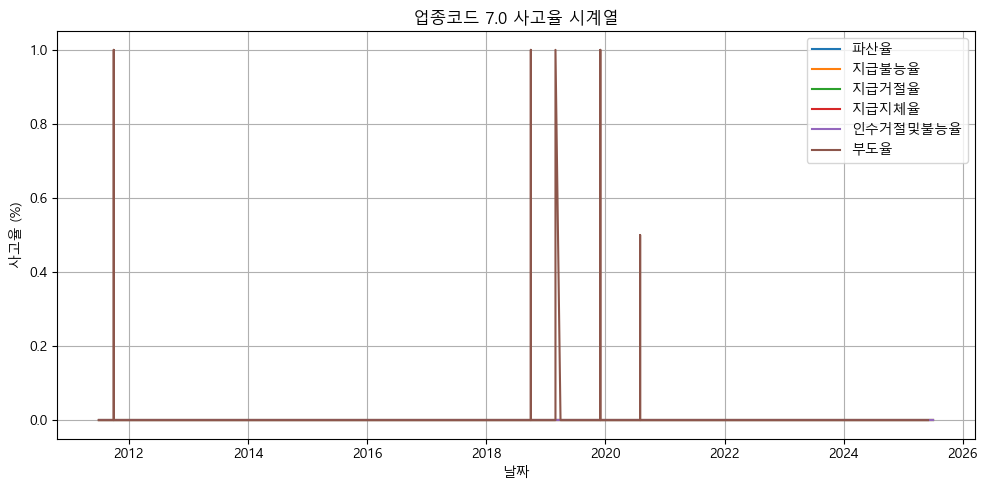

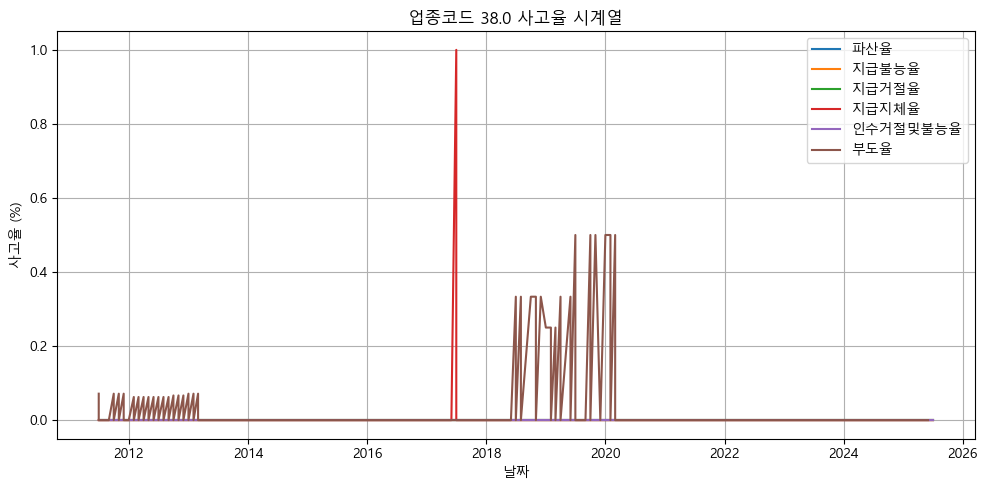

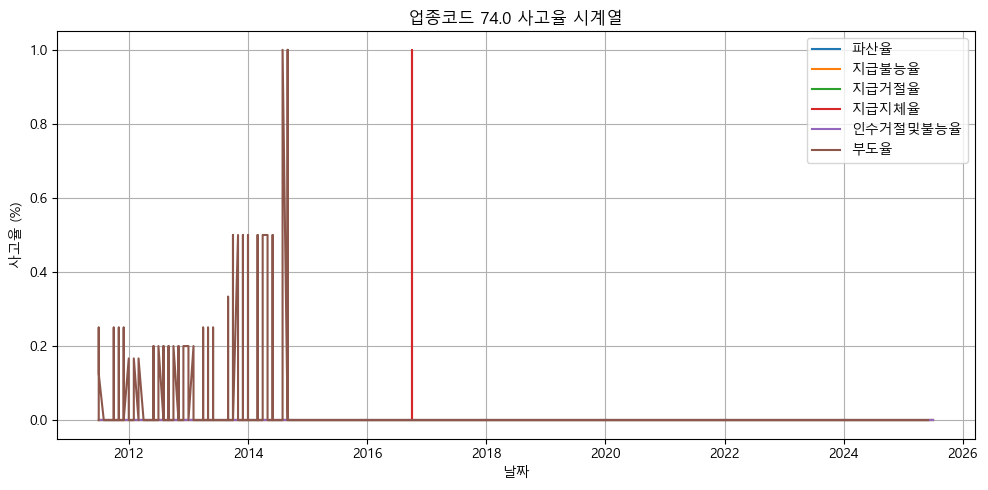

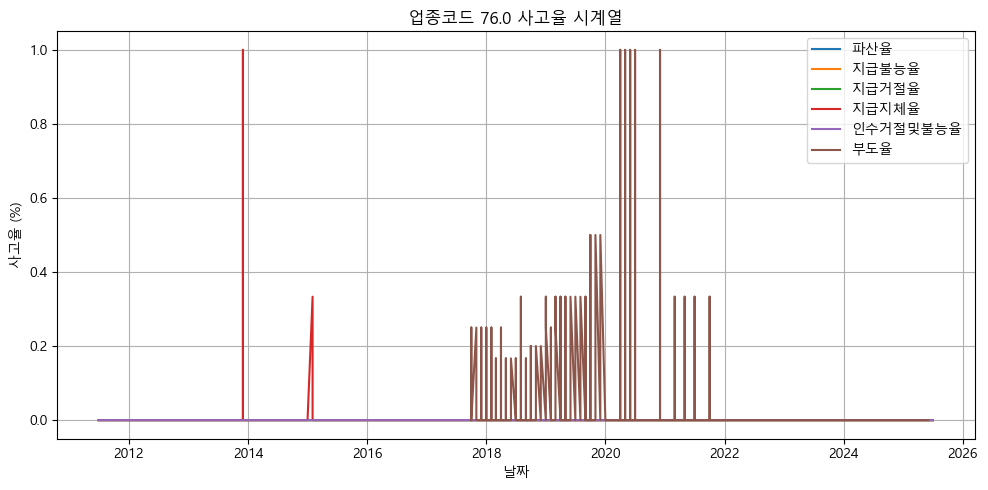

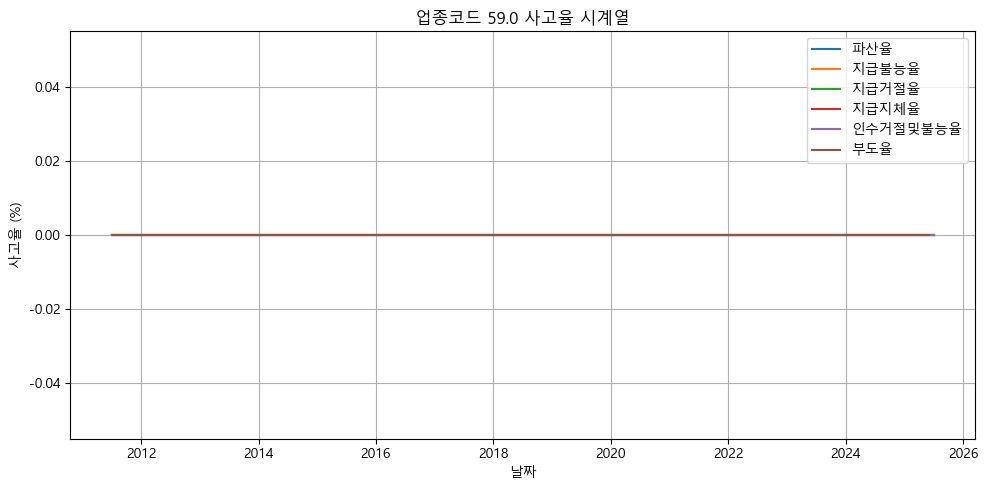

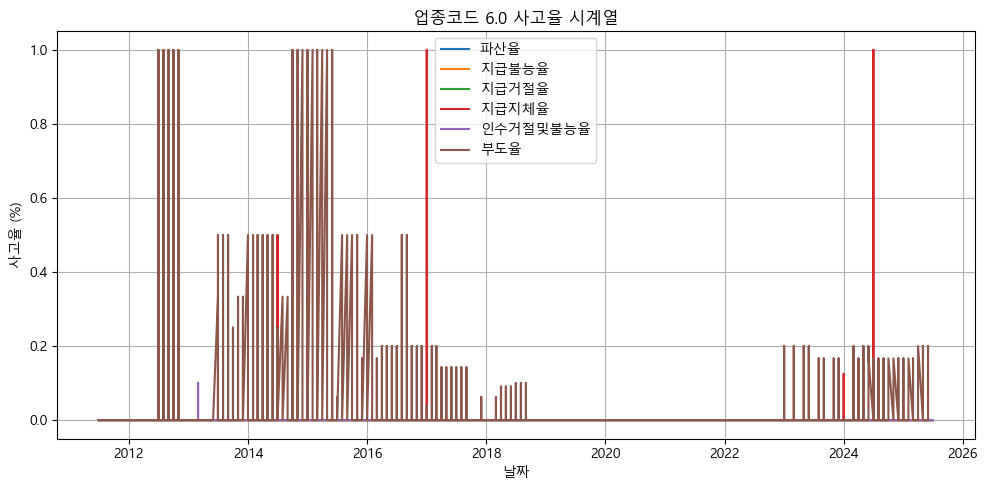

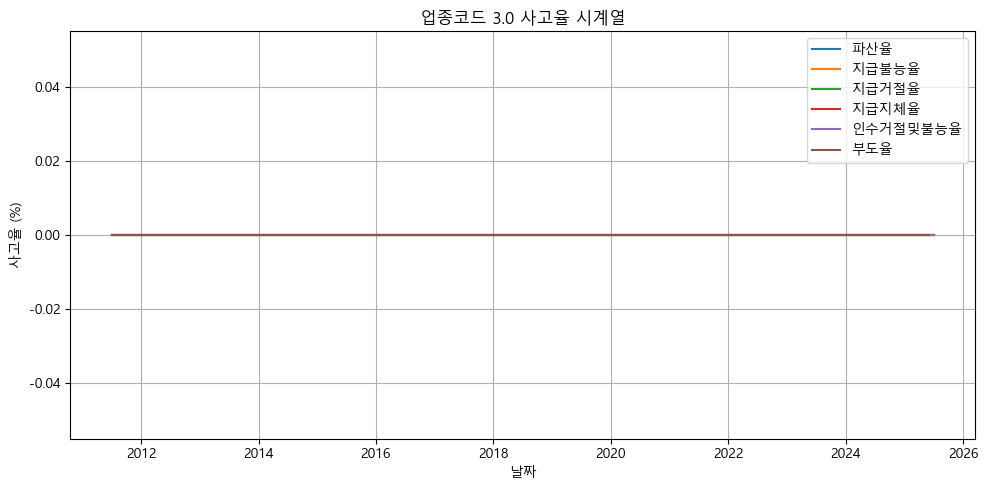

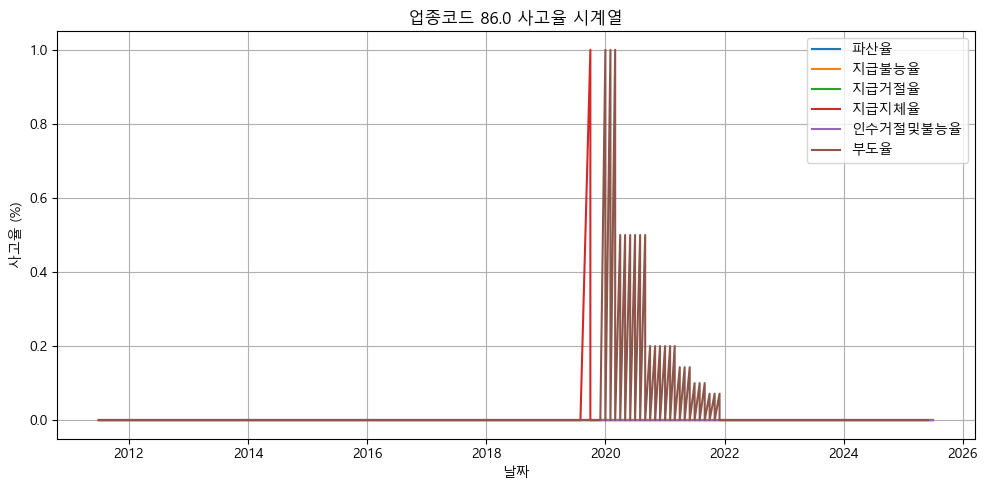

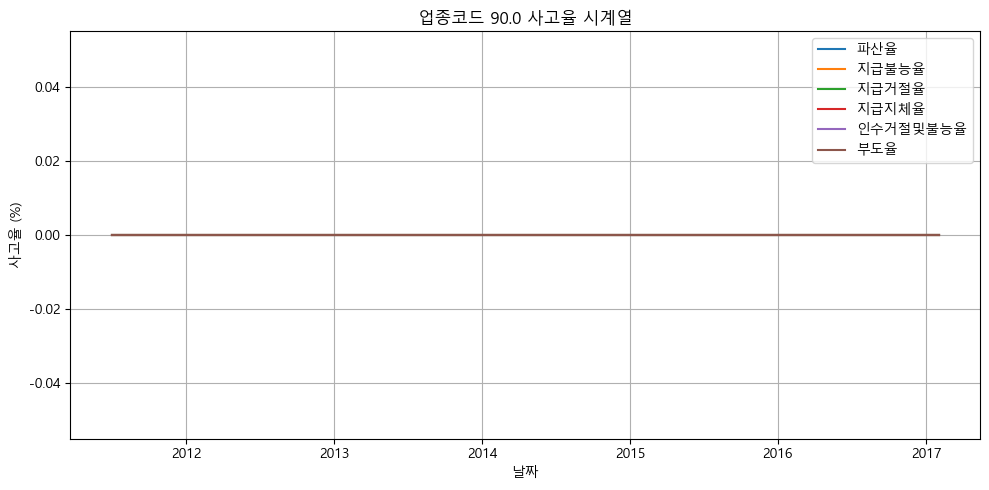

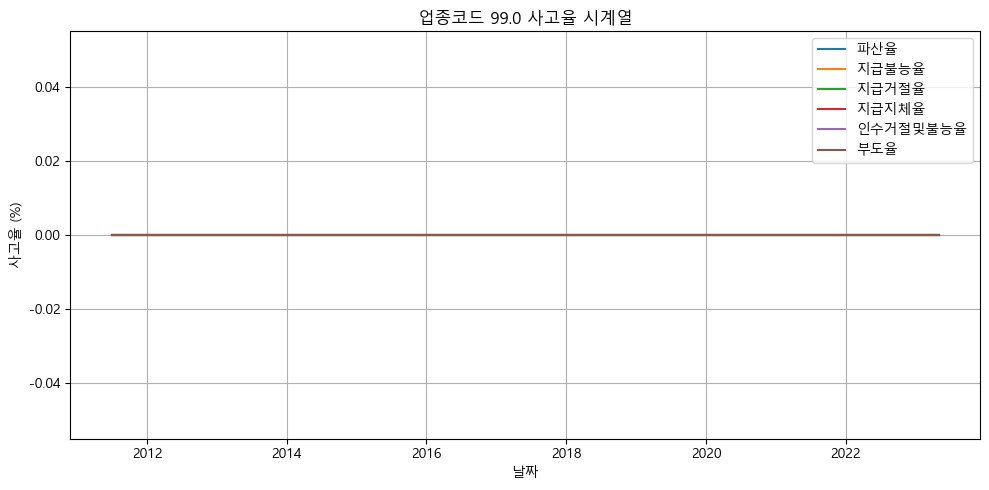

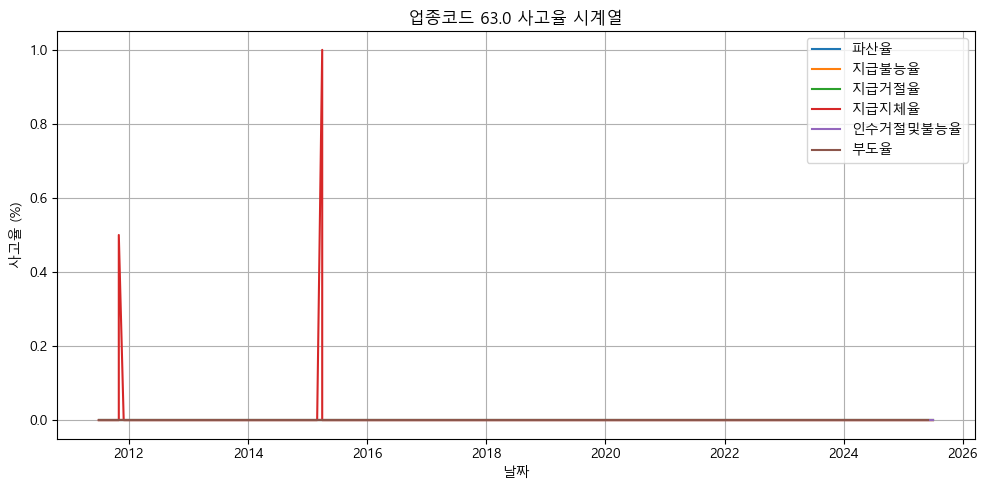

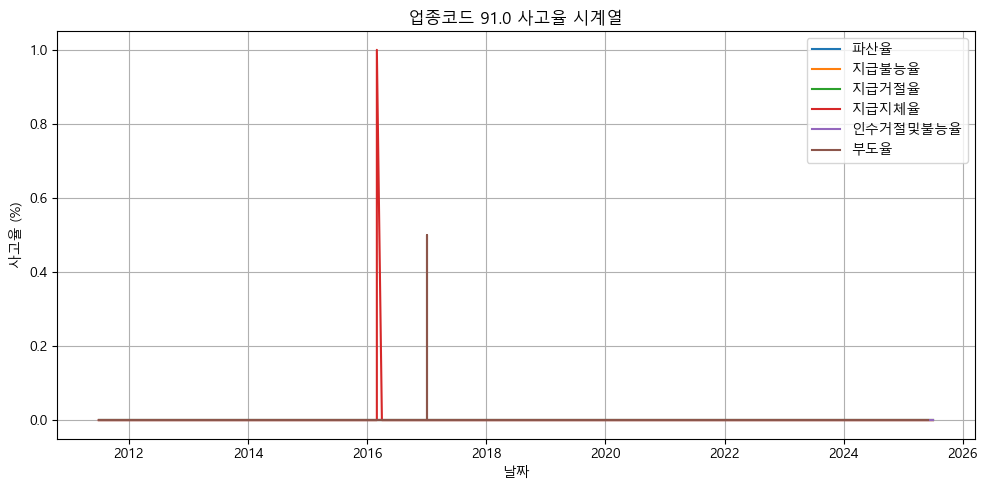

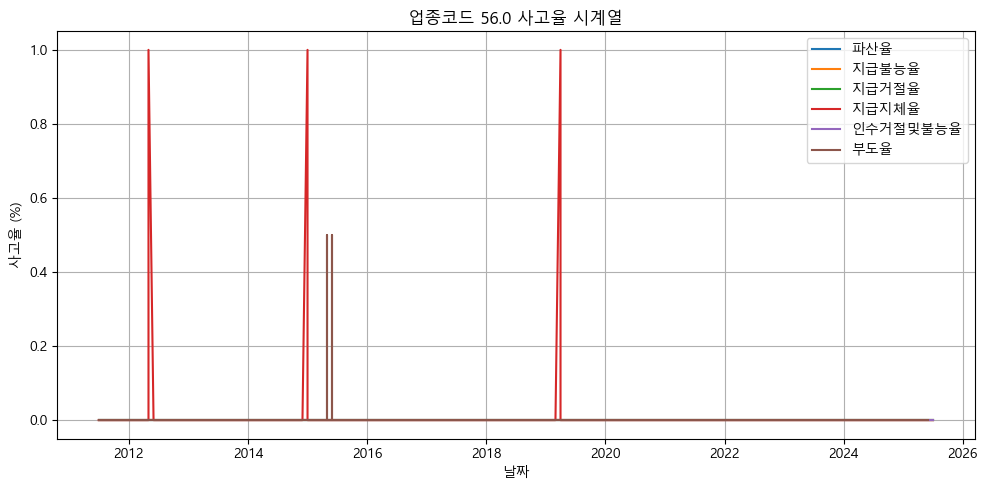

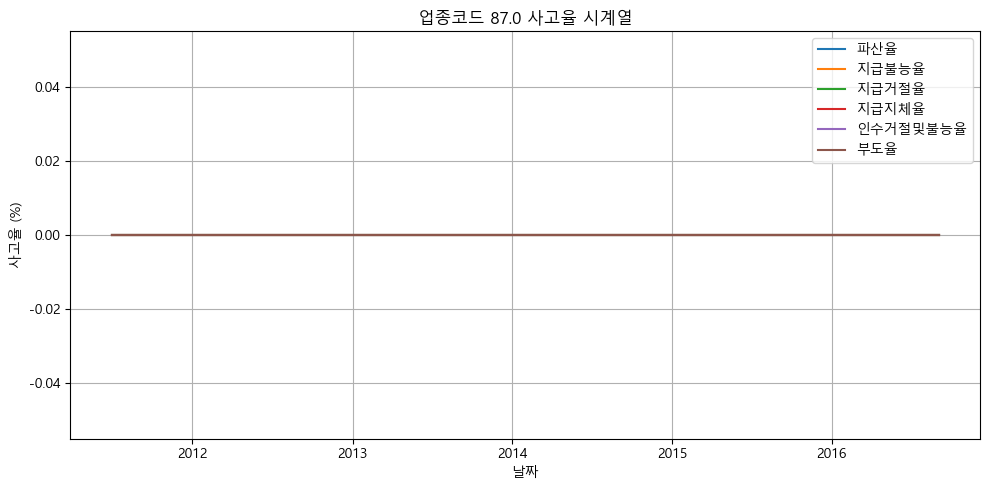

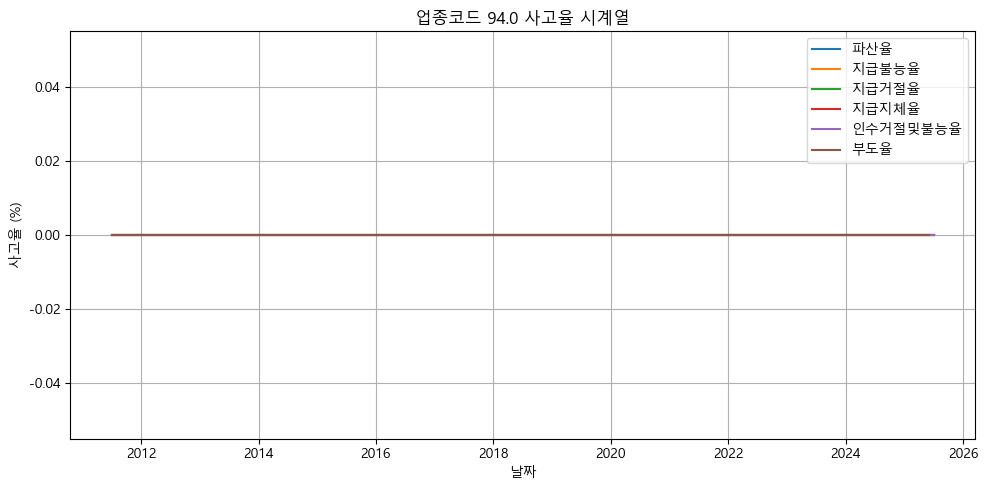

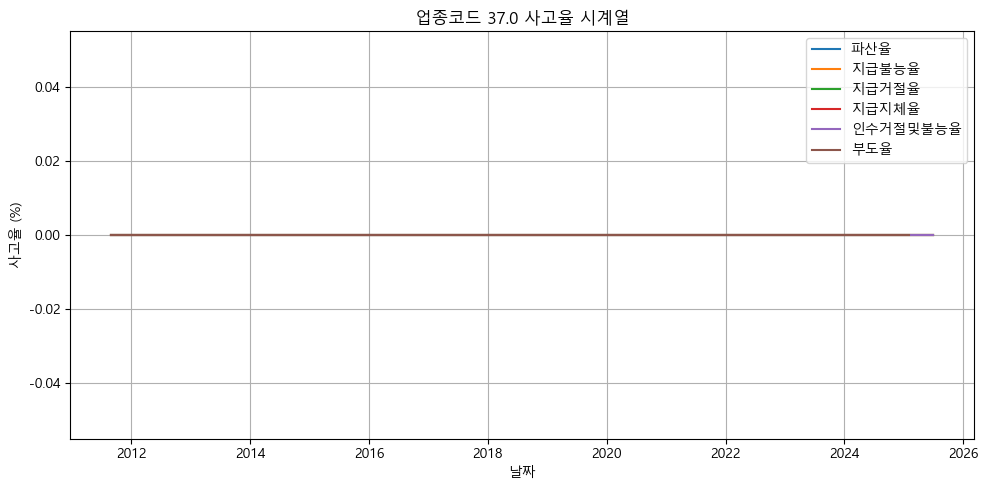

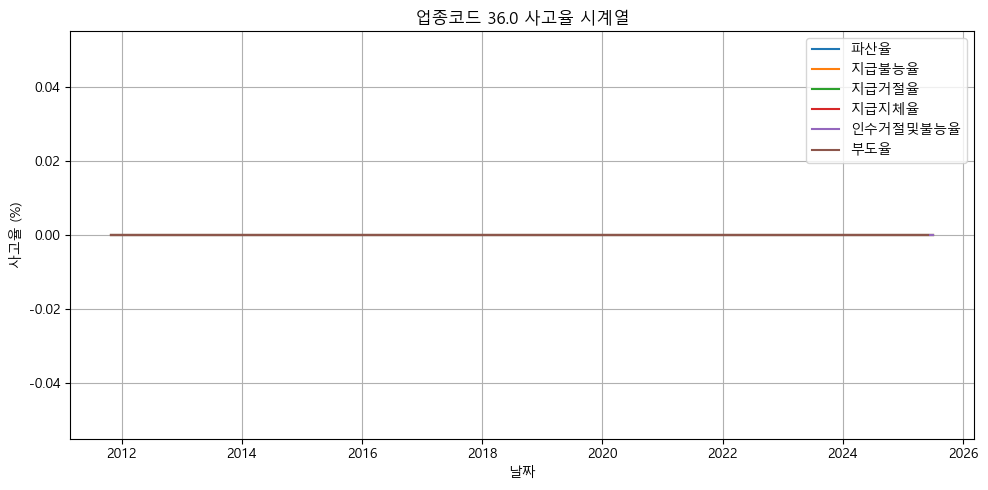

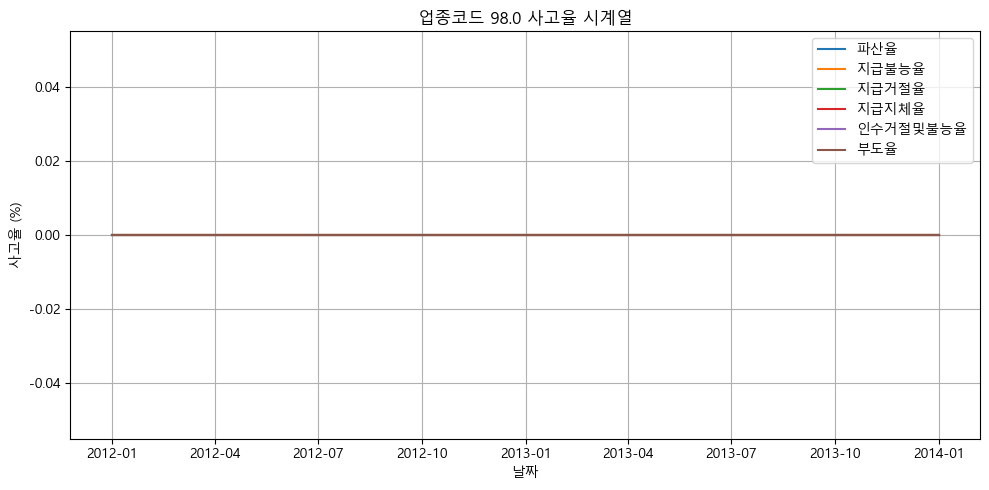

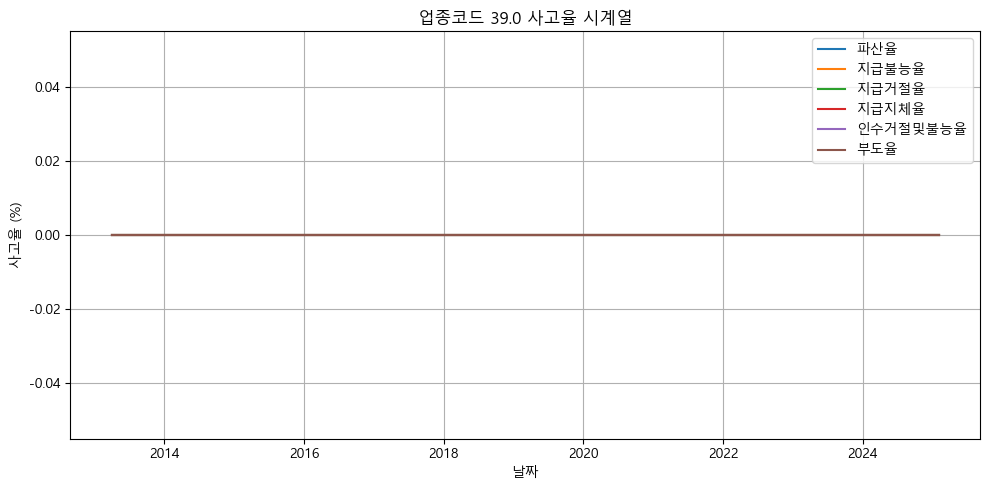

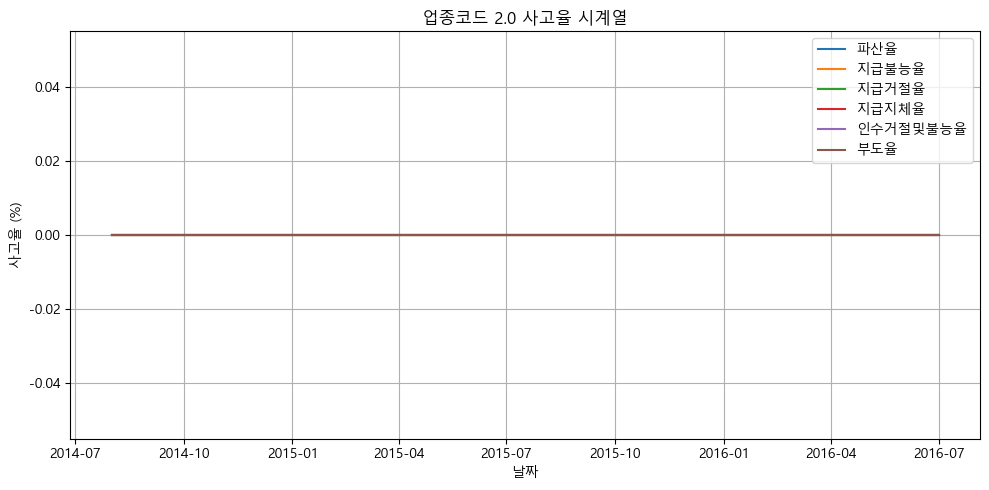

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

uu['날짜'] = pd.to_datetime(uu['년'].astype(str) + '-' + uu['월'].astype(str))

# 사고율 컬럼 리스트
rate_columns = ['파산율', '지급불능율', '지급거절율', '지급지체율', '인수거절및불능율', '부도율']

# 업종코드별로 시각화
업종코드_목록 = uu['업종코드'].unique()

for code in 업종코드_목록:
    df_code = uu[uu['업종코드'] == code]

    plt.figure(figsize=(10, 5))
    for col in rate_columns:
        plt.plot(df_code['날짜'], df_code[col], label=col)

    plt.title(f'업종코드 {code} 사고율 시계열')
    plt.xlabel('날짜')
    plt.ylabel('사고율 (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
pd.read_csv('Data/kups.csv', encoding='cp949')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,업종코드-10차 표준산업분류 연계표,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,일련번호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,세부설명,NaN,NaN
2,NaN,2021년 귀속\n업종코드,대분류,대분류,중분류,중분류,소분류,소분류,세분류,세분류,...,소분류,소분류,세분류,세분류,세세분류,연계,메인,NaN,NaN,NaN
3,1,011000,A,"농업, 임업 및 어업",01,농업,011,작물 재배업,0110,곡물 및 기타 식량작물 재배업,...,011,작물 재배업,0111,곡물 및 기타 식량작물 재배업,곡물 및 기타 식량작물 재배업,1,NaN,NaN,NaN,NaN
4,2,011001,A,"농업, 임업 및 어업",01,농업,011,작물 재배업,0110,"채소, 화훼작물 및 종묘 재배업",...,011,작물 재배업,0112,"채소, 화훼작물 및 종묘 재배업",채소작물 재배업,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1602,990090,U,국제 및 외국기관,99,국제 및 외국기관,990,국제 및 외국기관,9900,국제 및 외국기관,...,990,국제 및 외국기관,9900,국제 및 외국기관,기타 국제 및 외국기관,1,NaN,NaN,NaN,NaN
1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,715,회사본부 및 경영 컨설팅 서비스업,7151,회사본부,제조업 회사본부,1,NaN,표준산업분류에 해당하는 국세청 업종코드가 없음,NaN,NaN
1727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,715,회사본부 및 경영 컨설팅 서비스업,7151,회사본부,기타 산업 회사본부,1,NaN,표준산업분류에 해당하는 국세청 업종코드가 없음,NaN,NaN
1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,981,자가 소비를 위한 가사 생산 활동,9810,자가 소비를 위한 가사 생산 활동,자가 소비를 위한 가사 생산 활동,1,NaN,표준산업분류에 해당하는 국세청 업종코드가 없음,NaN,NaN
